In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [175]:
#importing data
df = pd.read_csv('data.csv')
df.head()



,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s8.new.rev.p6,s4.loc.ic.ins.p1,...,prop.og.mou.tot.mou.all.p6,prop.i2i.og.mou.p6,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,prop.loc.i2i.mou.og.mou.p3,s3.rev.p1
0,-0.76,88.0482,3.106604,3.754955,4,14,39.29,57.320,-0.17,1,...,0.454642,0.497397,4,0,9,6.02,8.20,46.465636,0.609456,0.22
1,-0.98,67.5039,3.094574,5.550865,1,2,21.67,38.700,-0.32,3,...,0.343190,0.767617,6,0,20,3.66,8.10,34.525456,1.000000,0.38
2,-0.98,33.9248,2.324016,2.438114,2,3,30.00,15.320,-0.05,3,...,0.101838,0.619034,6,1,19,4.33,4.36,10.298451,0.699592,0.11
3,-0.92,82.6780,2.630749,2.858961,2,3,50.00,51.956,-0.18,4,...,0.066602,0.437088,7,2,11,3.40,3.53,6.670783,0.086617,5.18
4,-0.97,96.8379,2.674316,2.912397,3,2,22.50,66.886,0.01,4,...,0.219821,0.585977,6,1,14,3.85,3.87,21.998905,0.683105,0.10


In [176]:
# Remove duplicates
df.drop_duplicates(inplace=True)
print("Number of records after removing duplicates are :",df.shape[0])


Number of records after removing duplicates are : 25000


In [177]:
# Drop unique value
nunique_cols = df.nunique()
cols_to_drop = nunique_cols[nunique_cols == 1].index
df.drop(cols_to_drop, axis=1, inplace=True)
print("columns after removing single unique value columns:", df.shape[1])


columns after removing single unique value columns: 111


In [178]:
# Drop zero variance
numerical_cols = df.select_dtypes(include=[np.number]).columns
zero_var_cols = df[numerical_cols].var()[df[numerical_cols].var() == 0].index
df.drop(zero_var_cols, axis=1, inplace=True)
print("columns after removing zero variance variables:", df.shape[1])

columns after removing zero variance variables: 111


In [179]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

In [180]:
# Verify there are no missing values
print("Missing values after imputation:")
df.isnull().sum().sum()

Missing values after imputation:


0

In [181]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

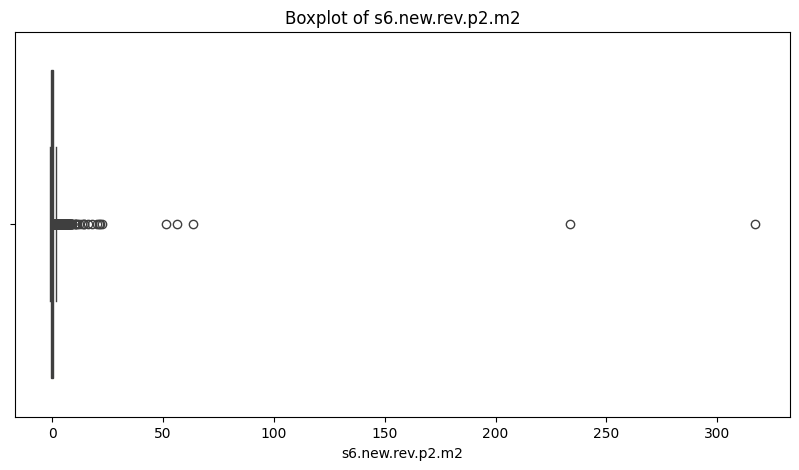

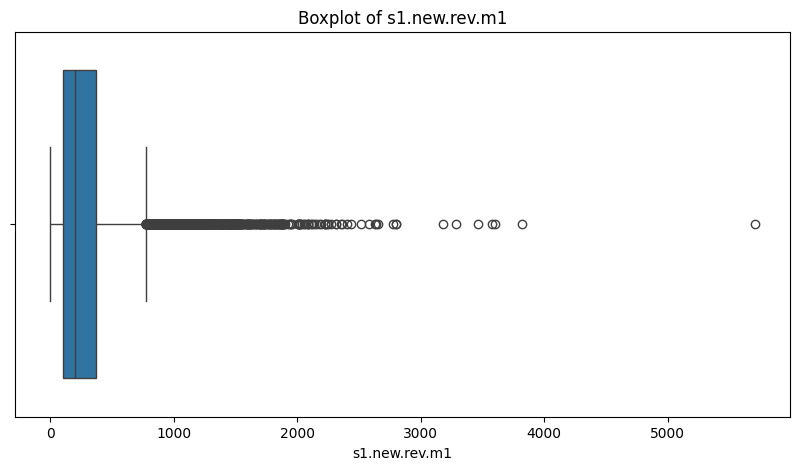

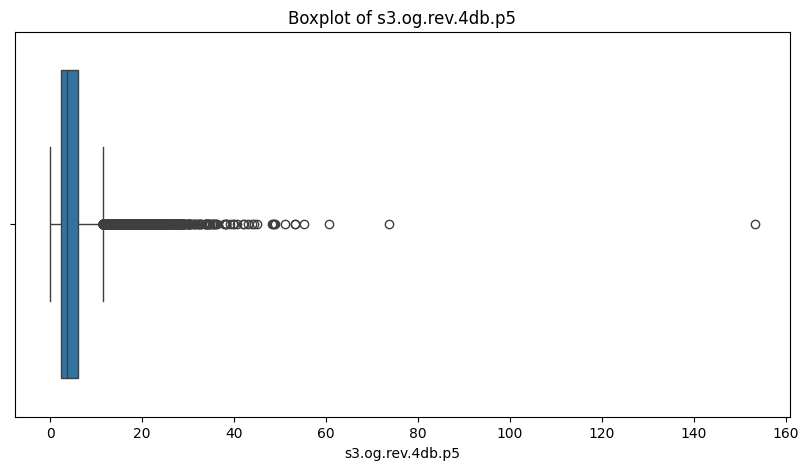

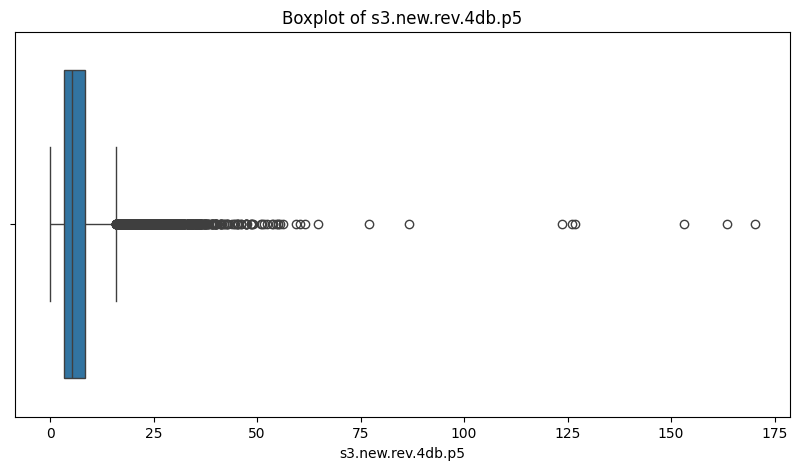

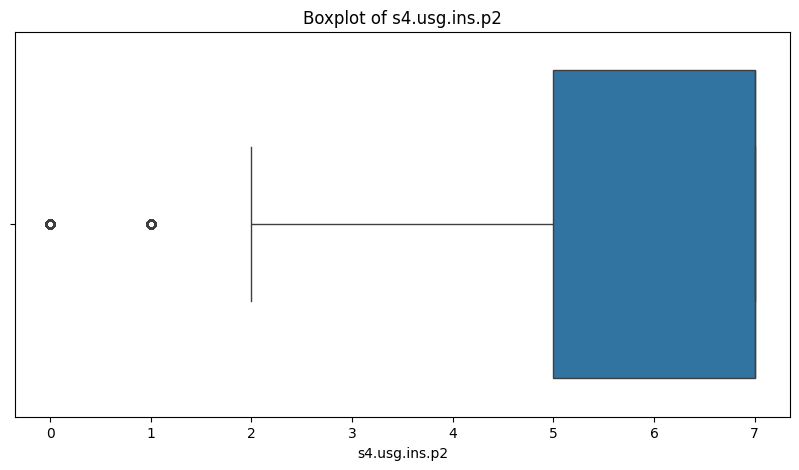

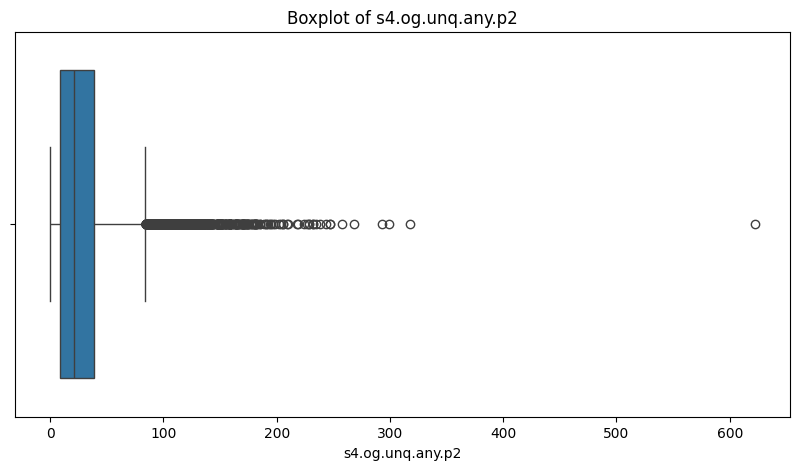

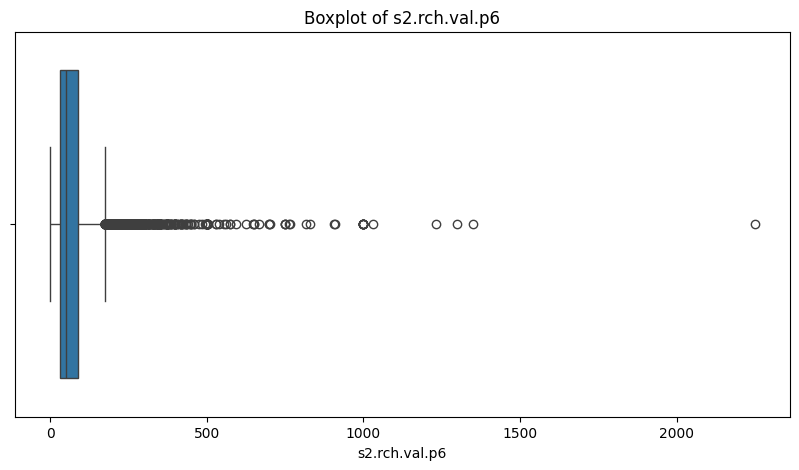

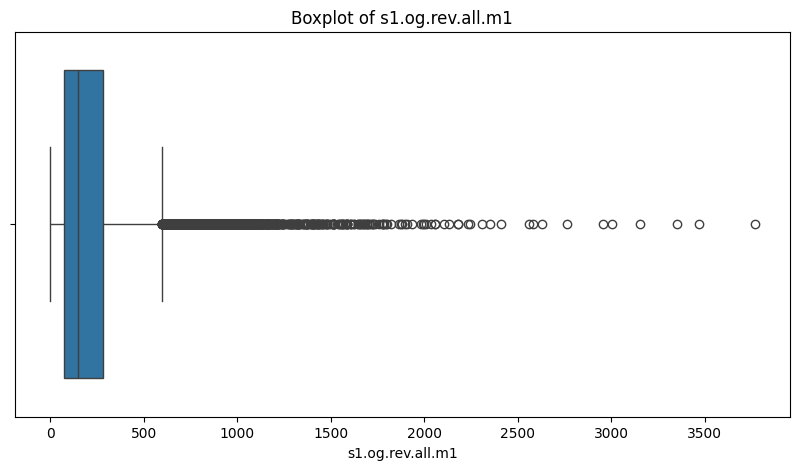

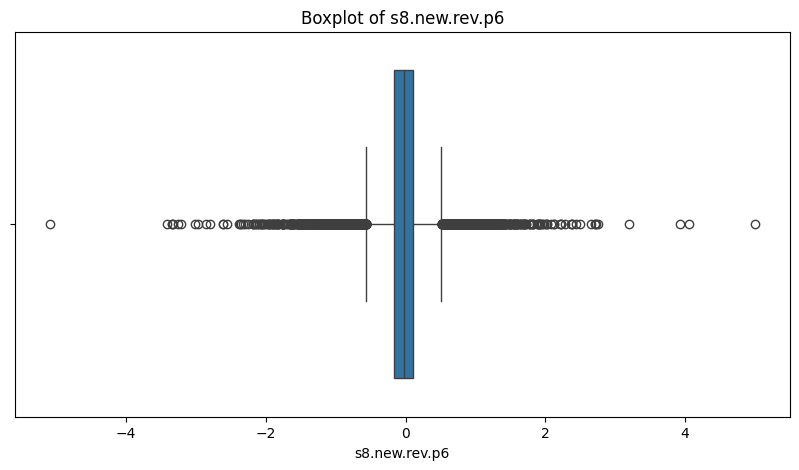

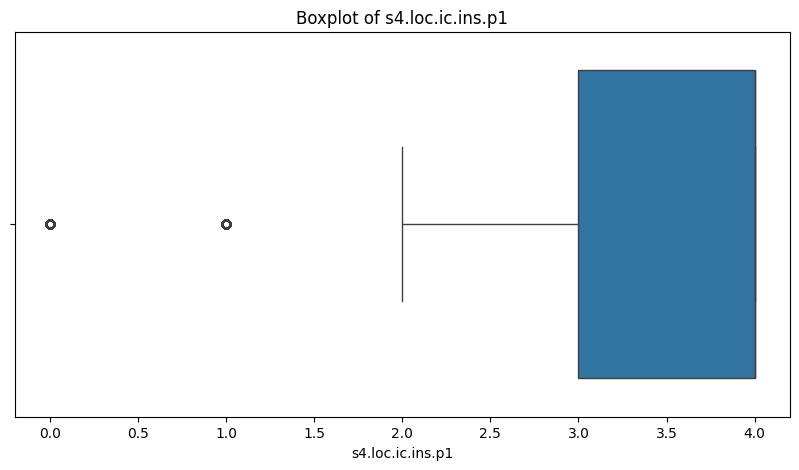

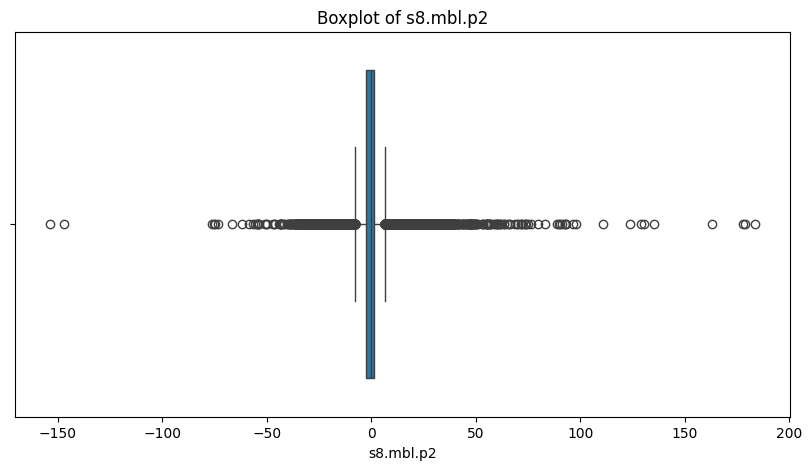

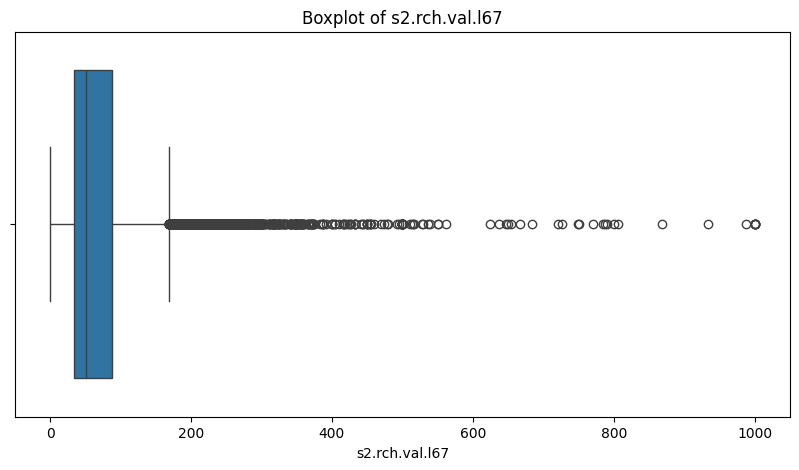

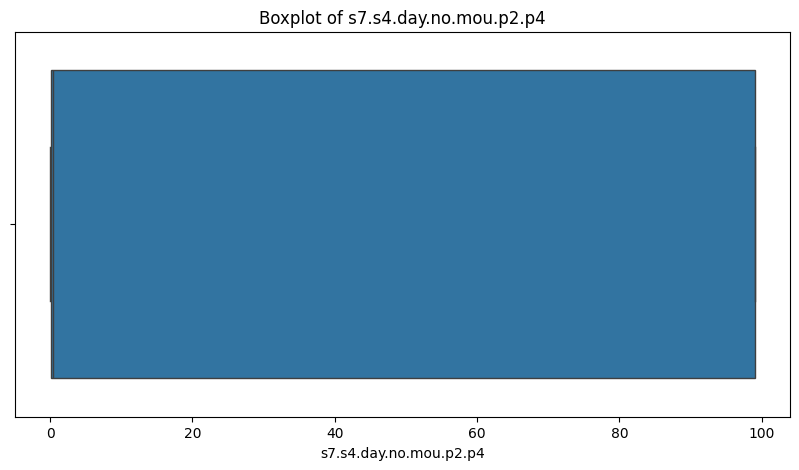

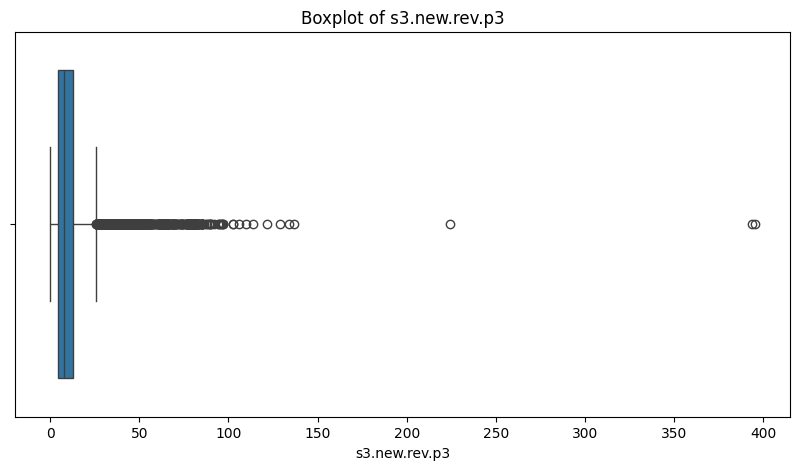

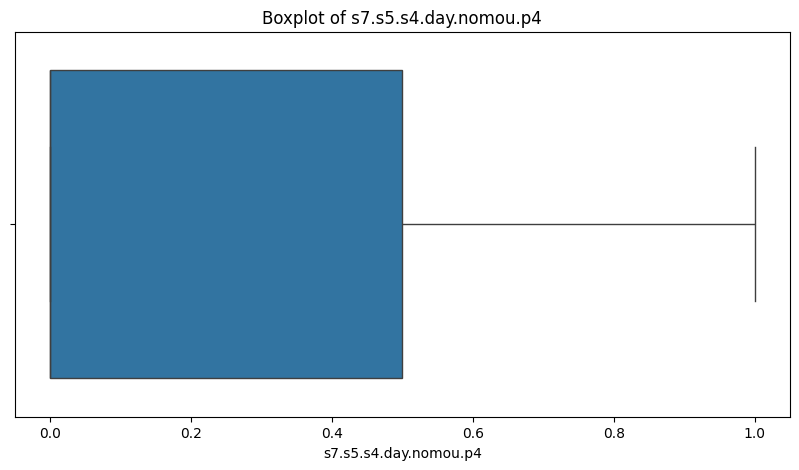

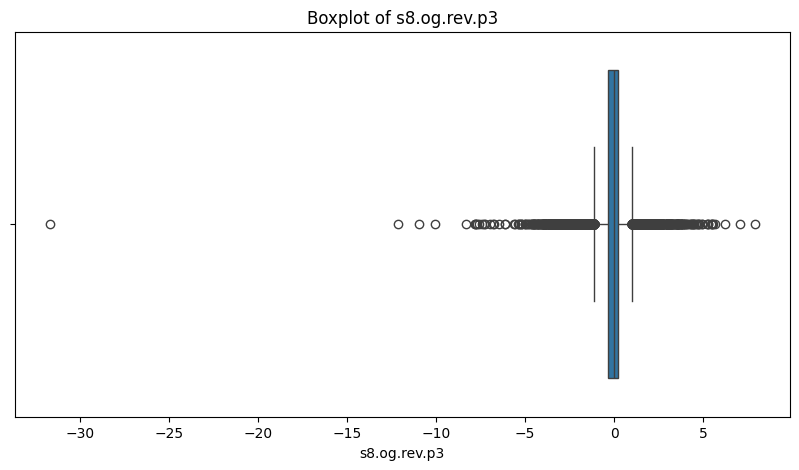

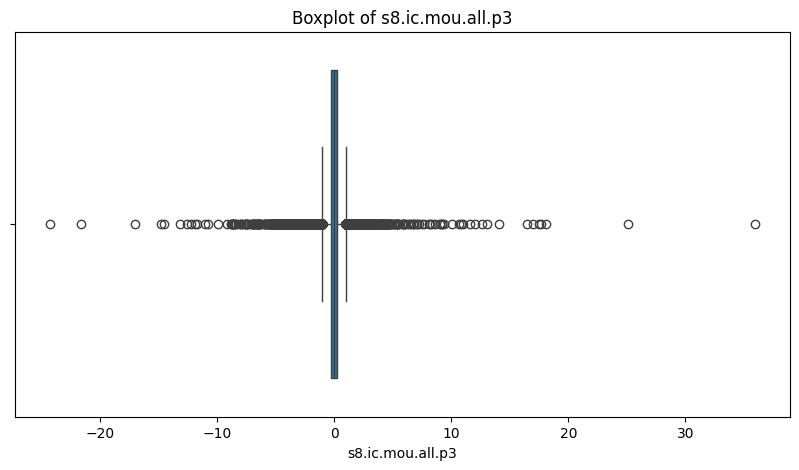

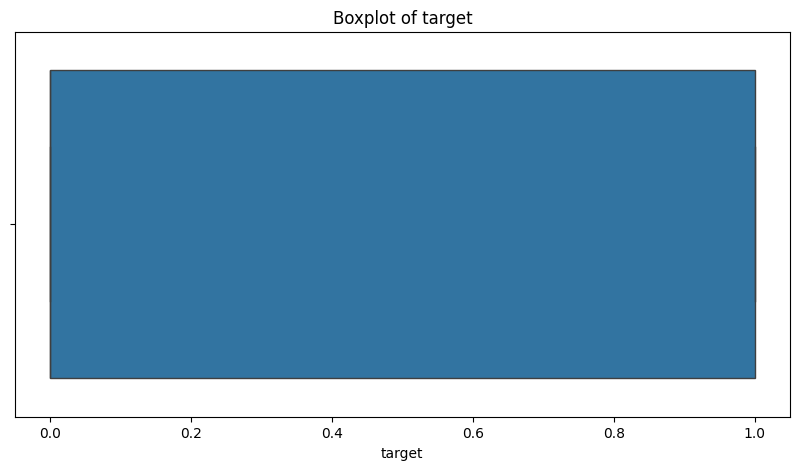

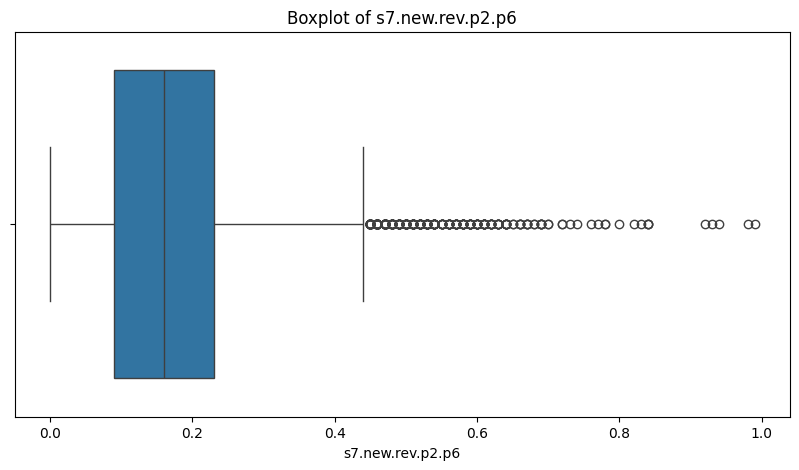

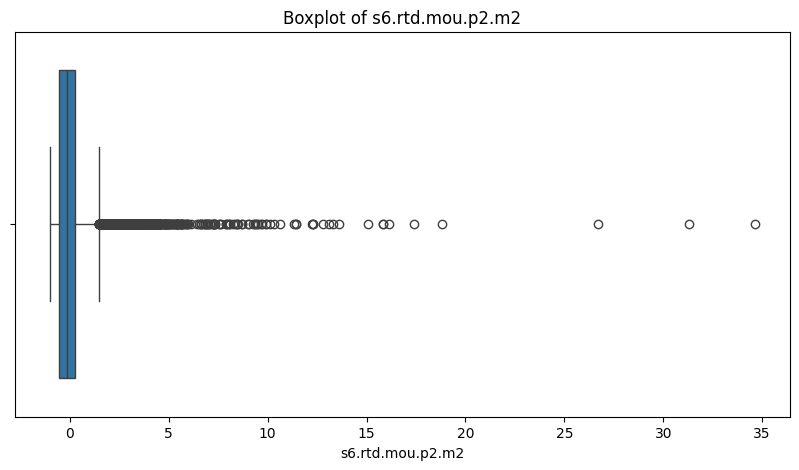

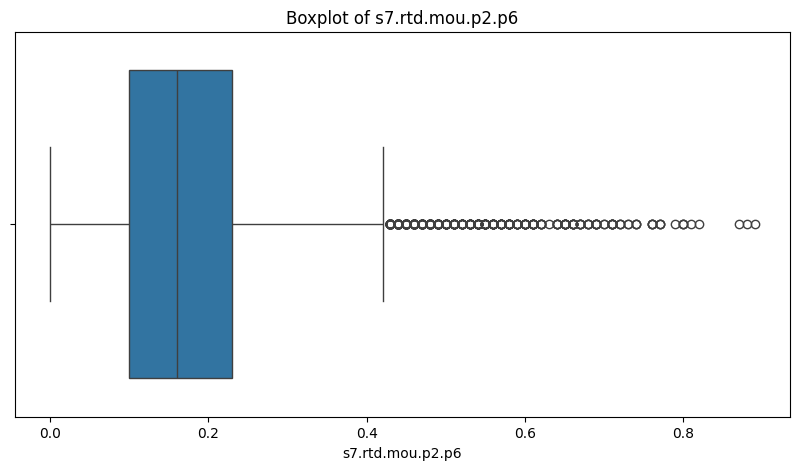

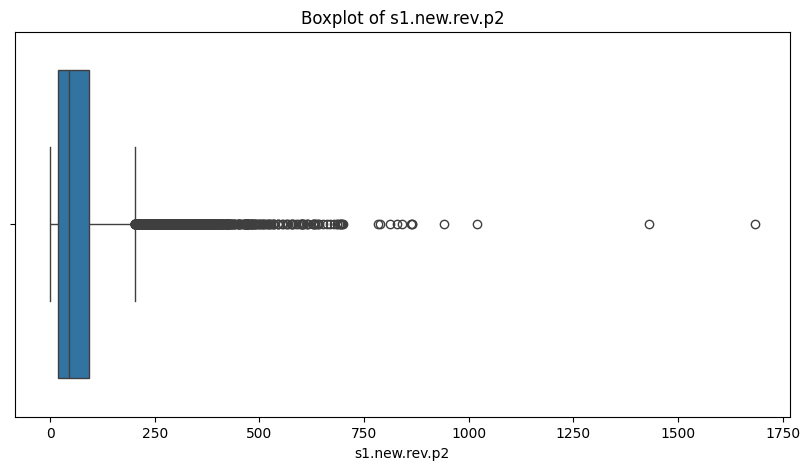

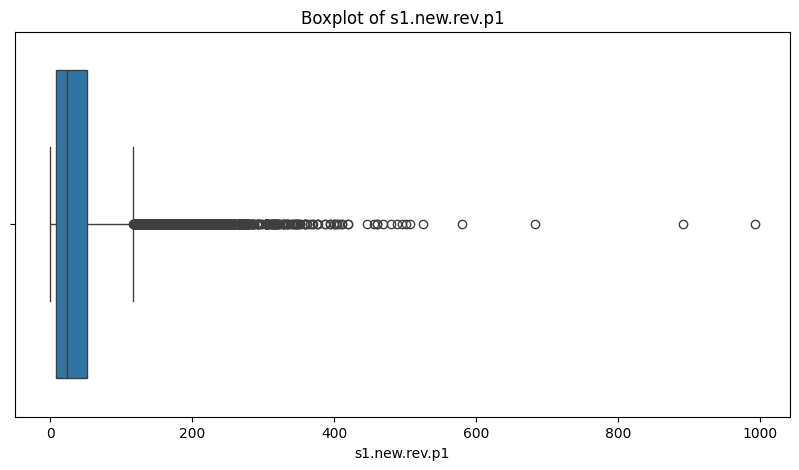

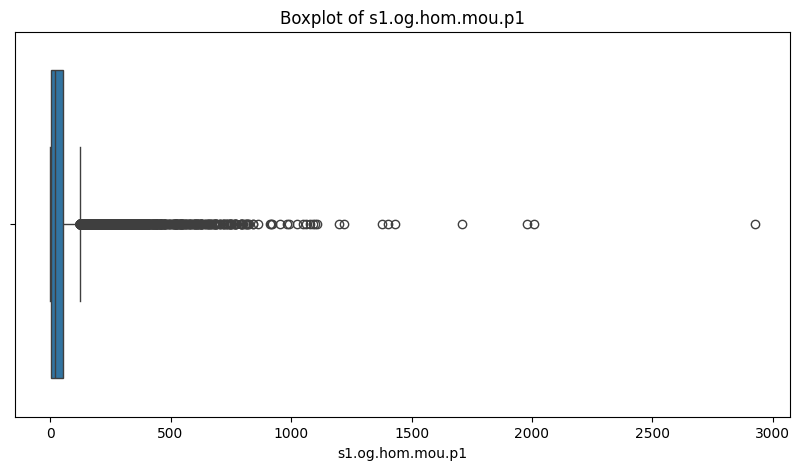

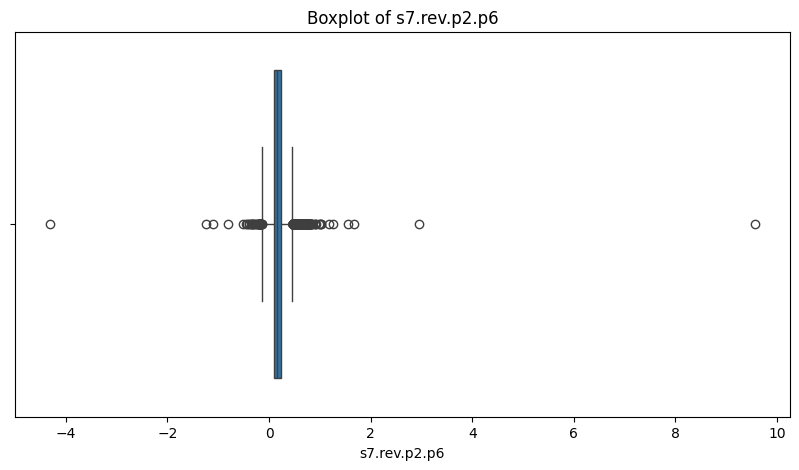

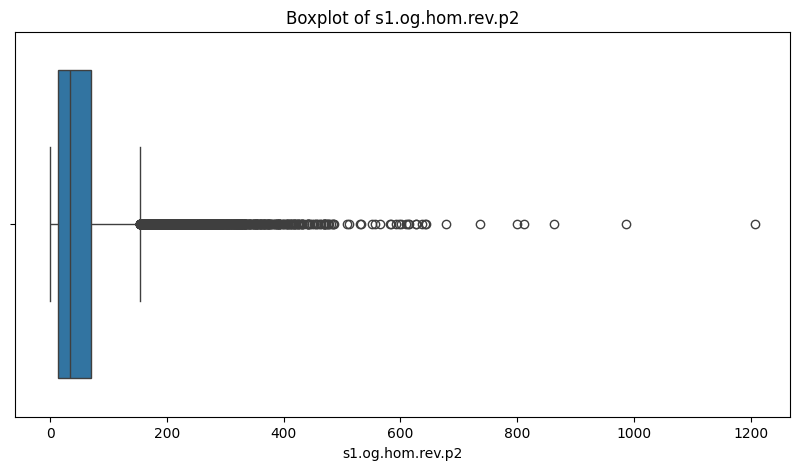

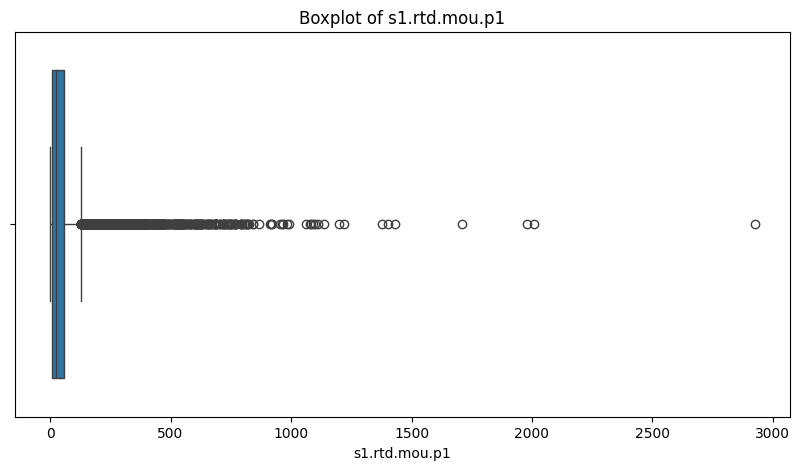

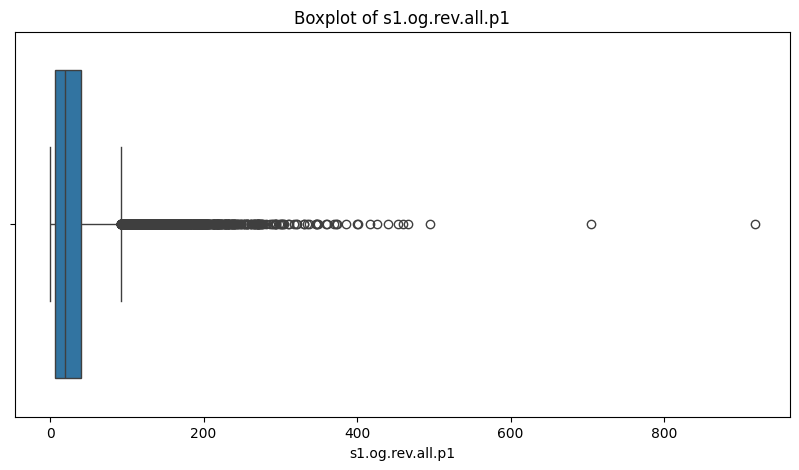

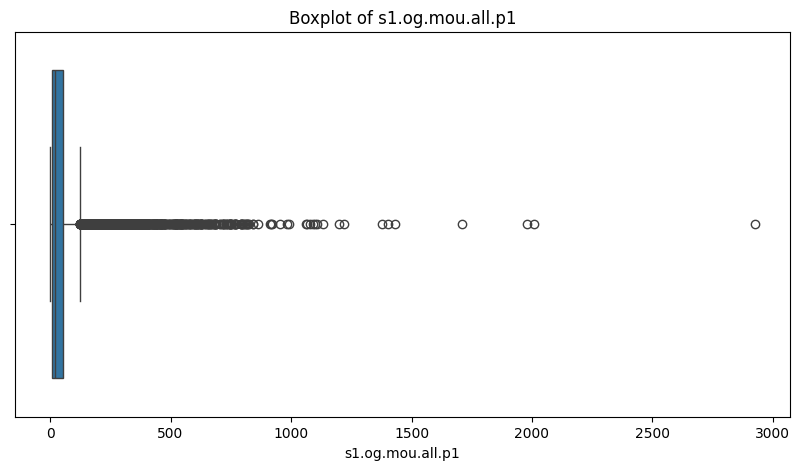

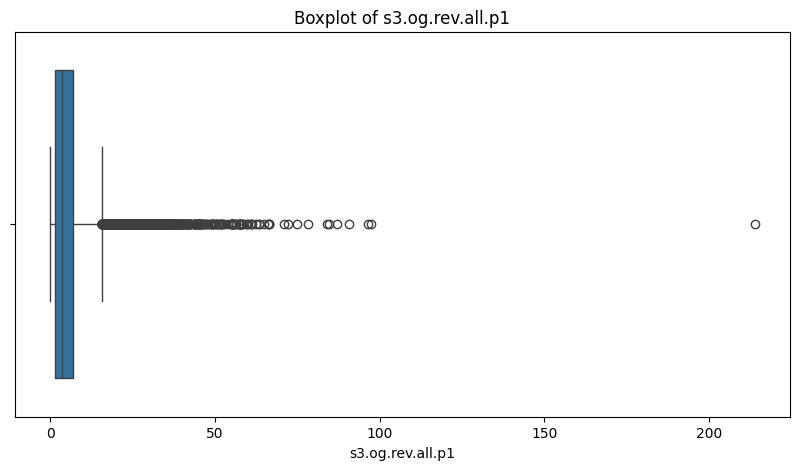

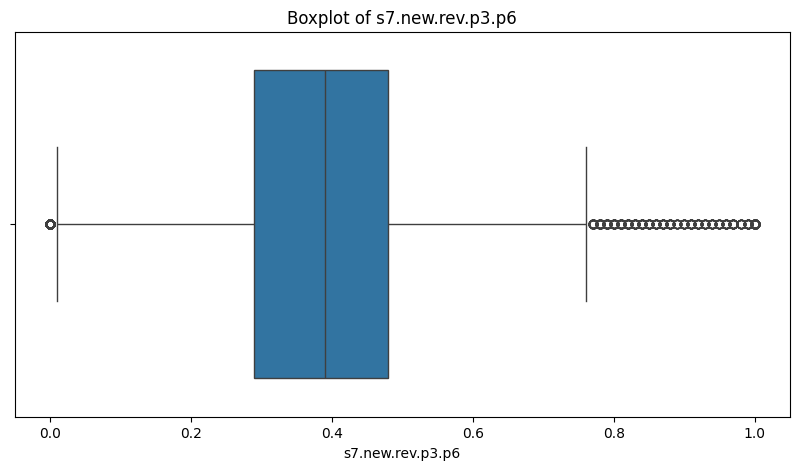

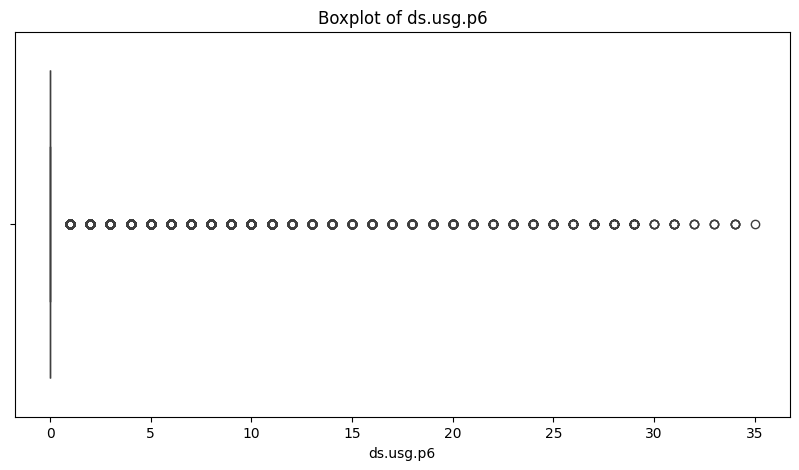

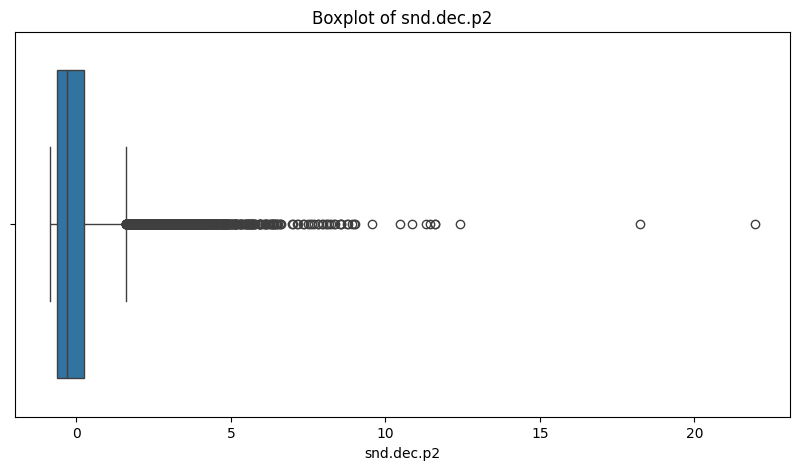

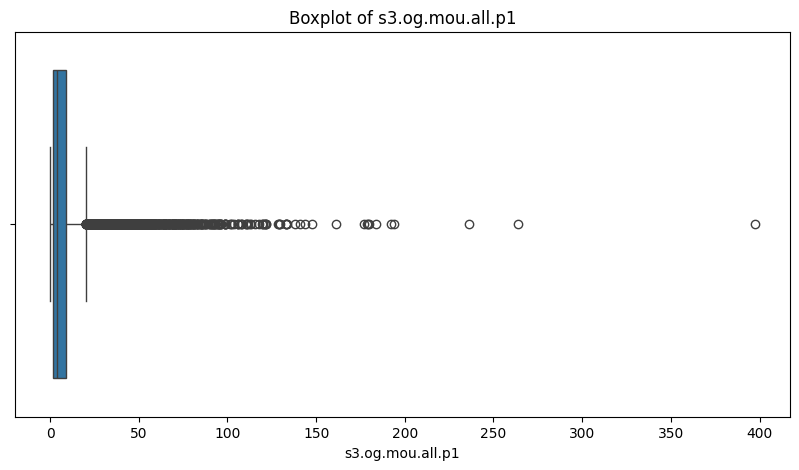

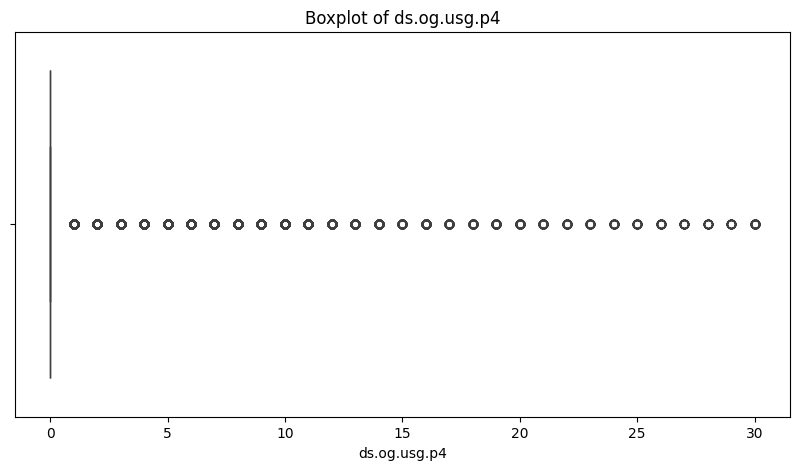

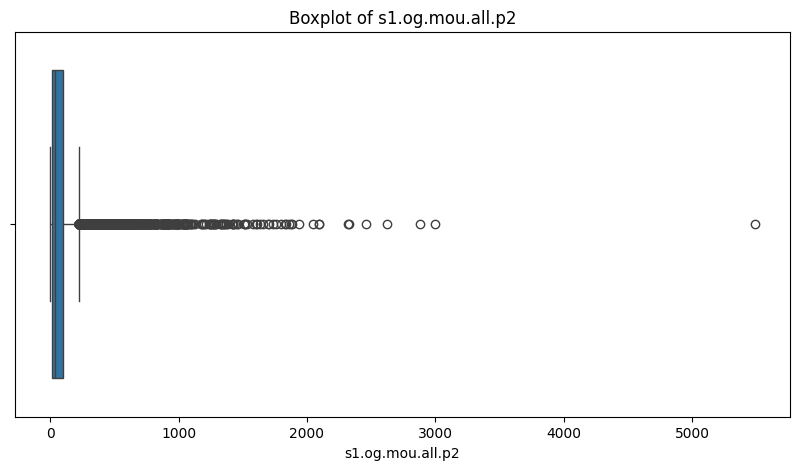

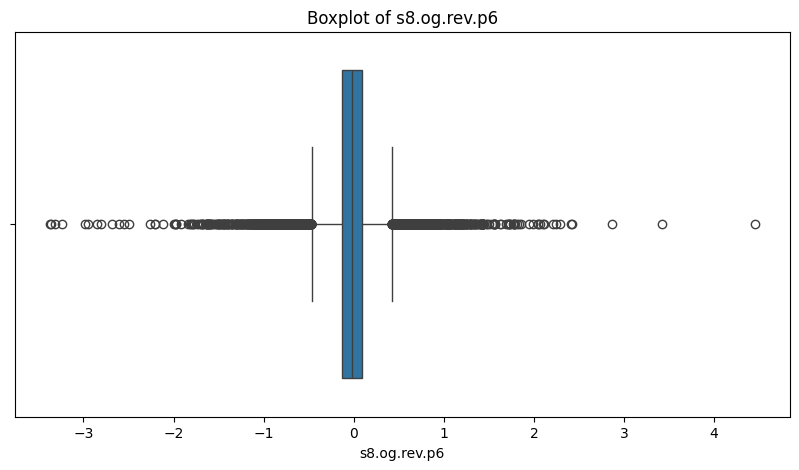

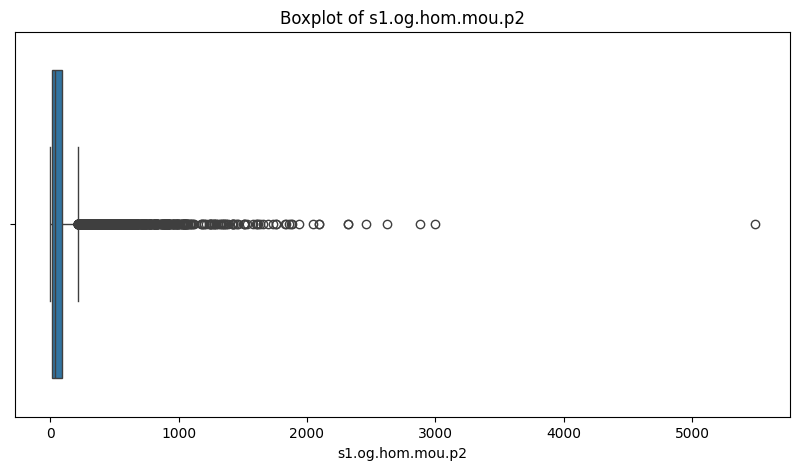

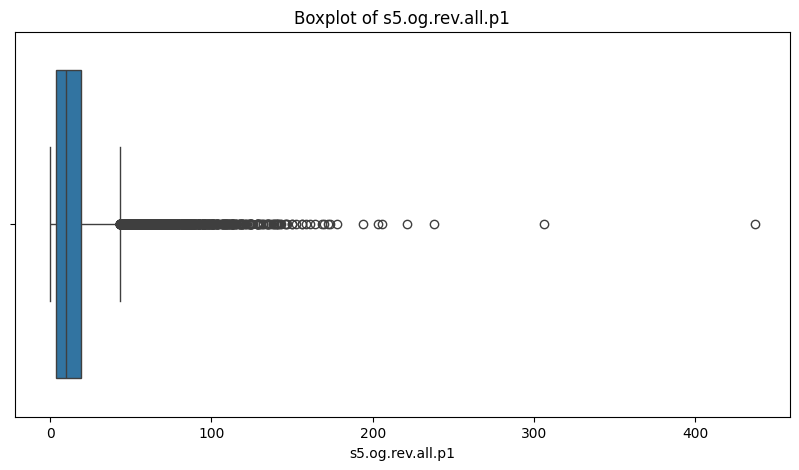

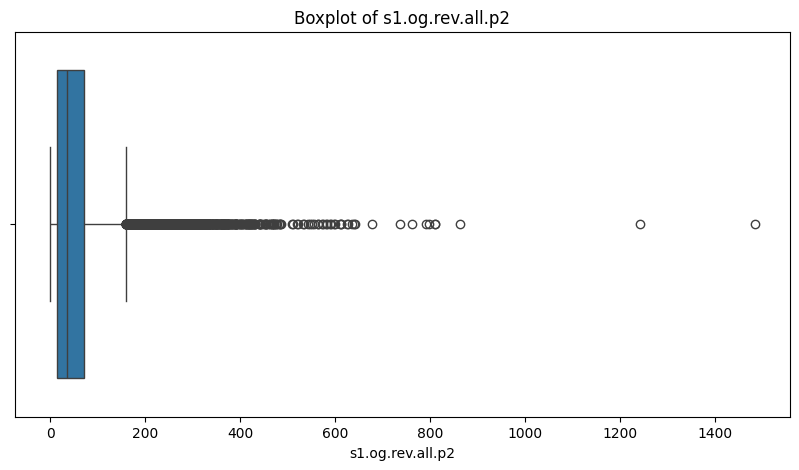

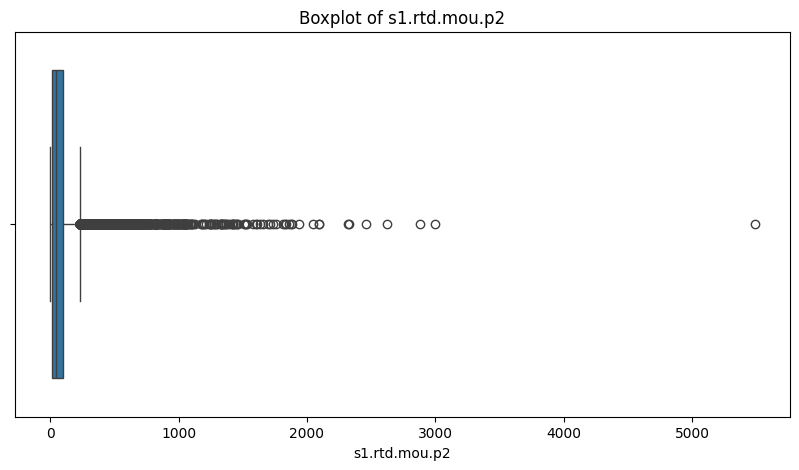

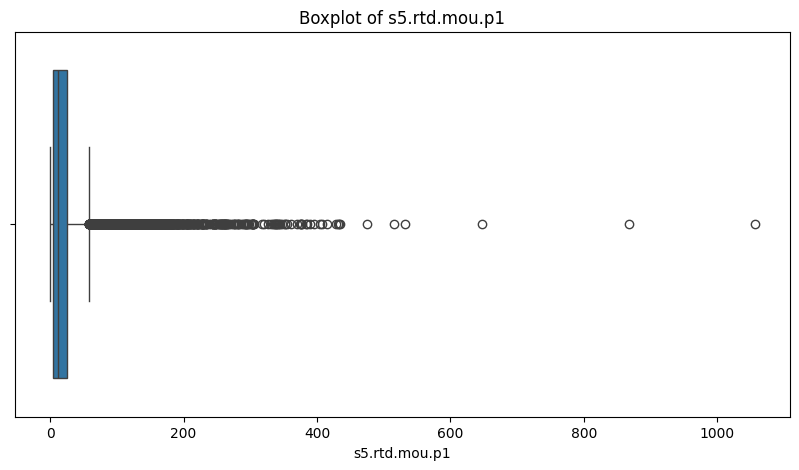

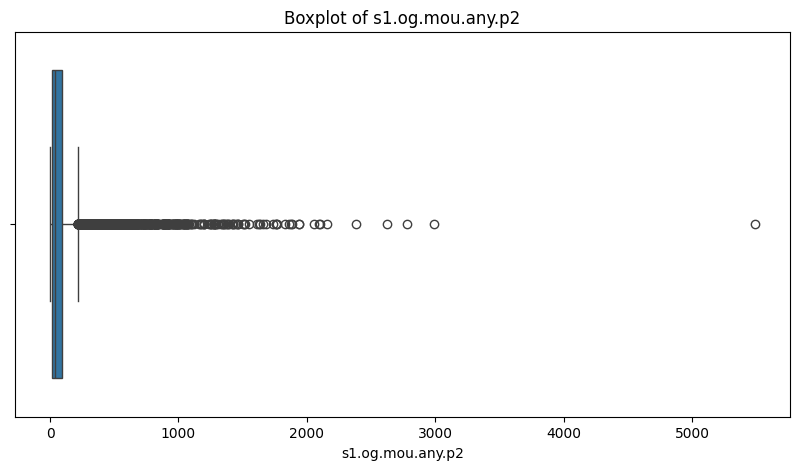

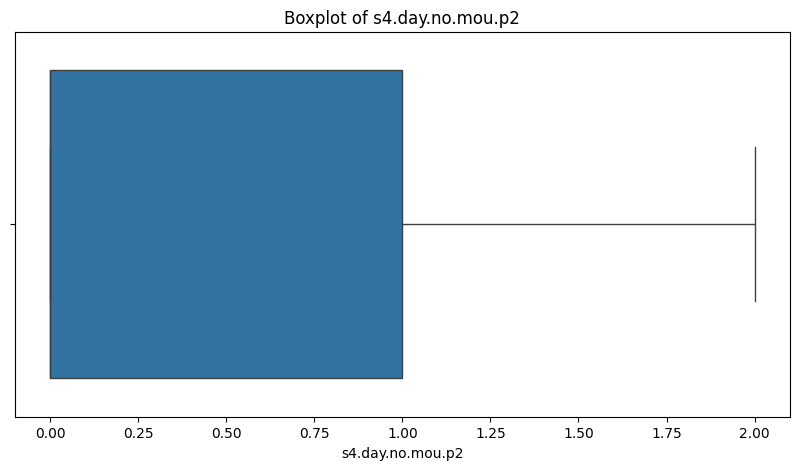

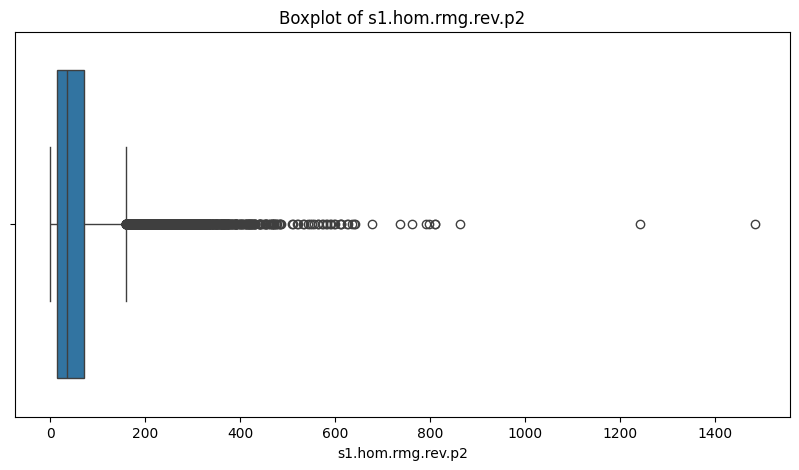

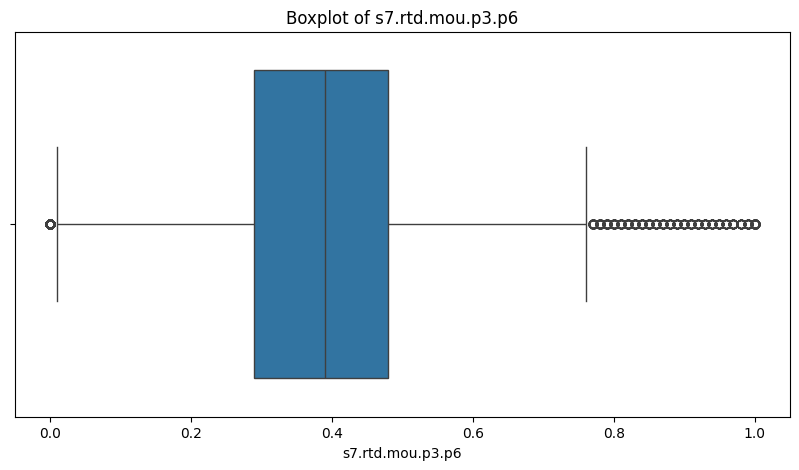

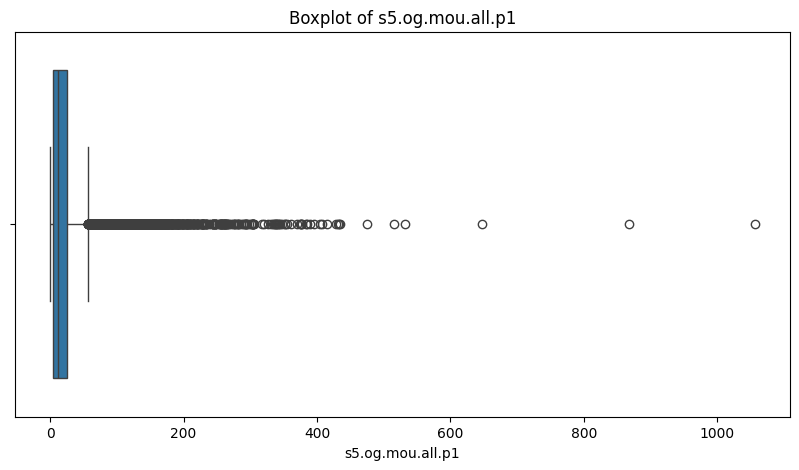

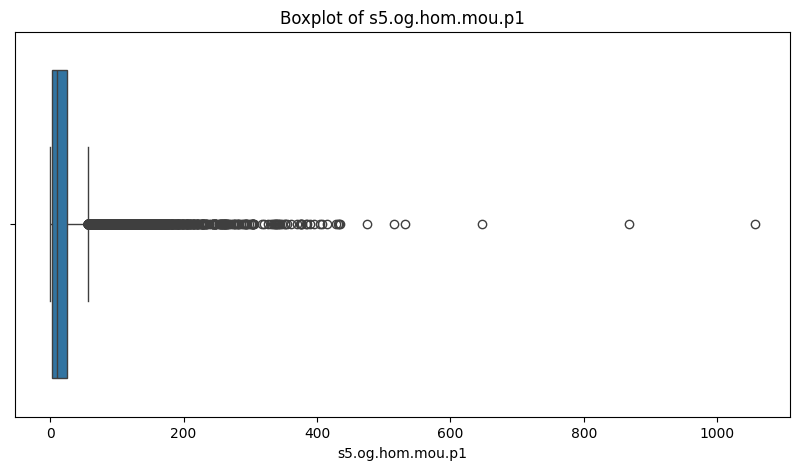

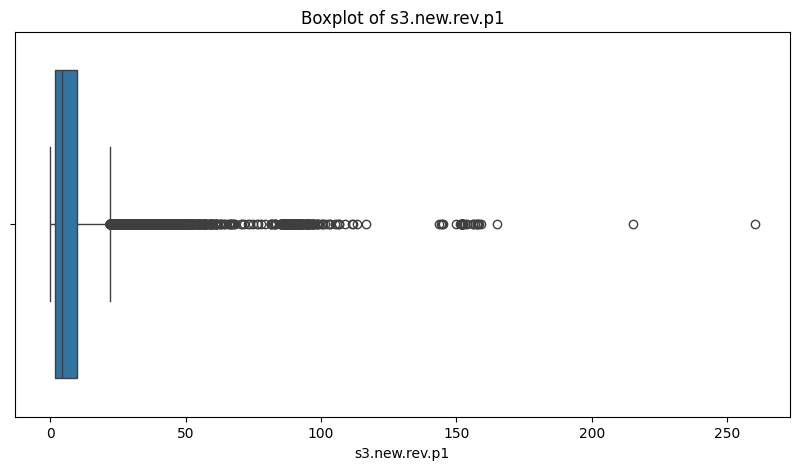

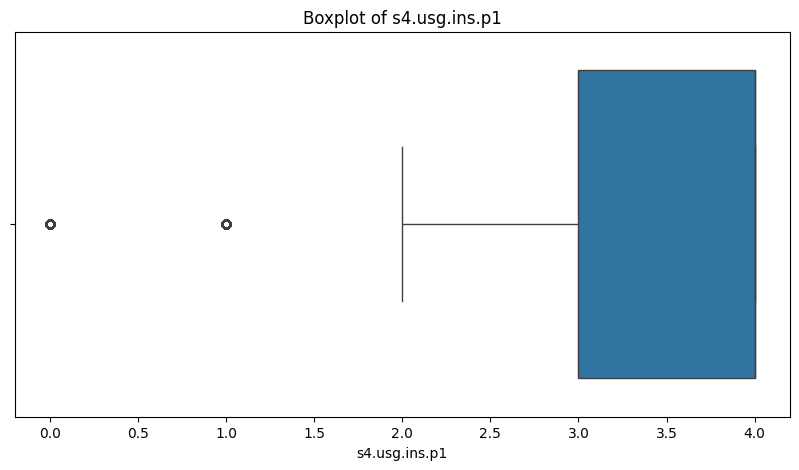

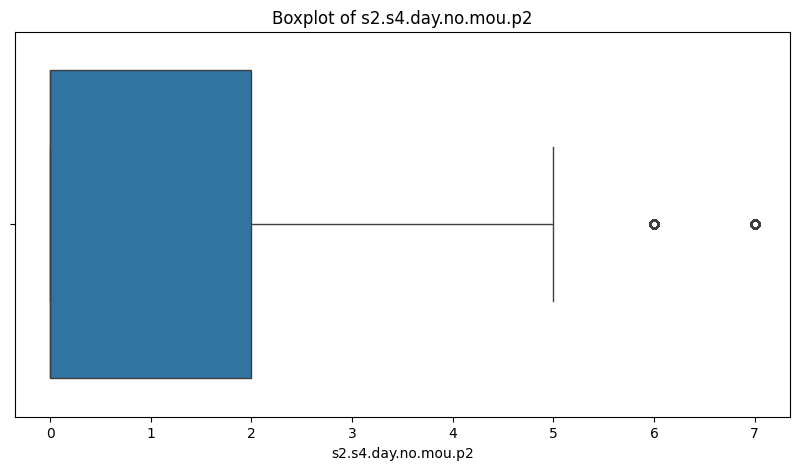

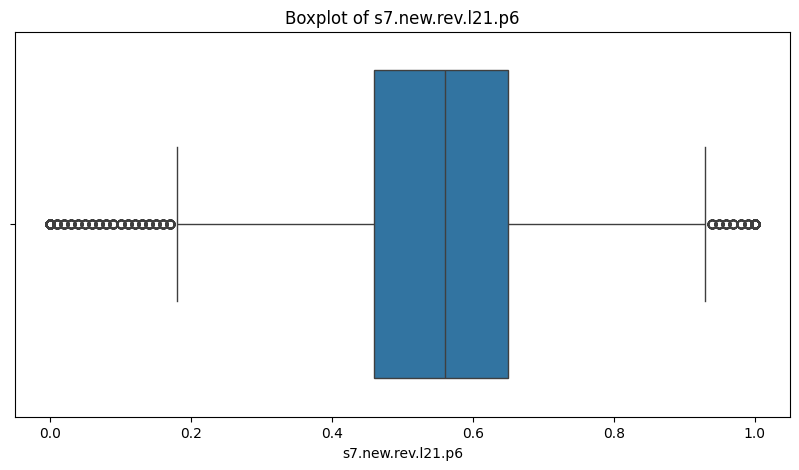

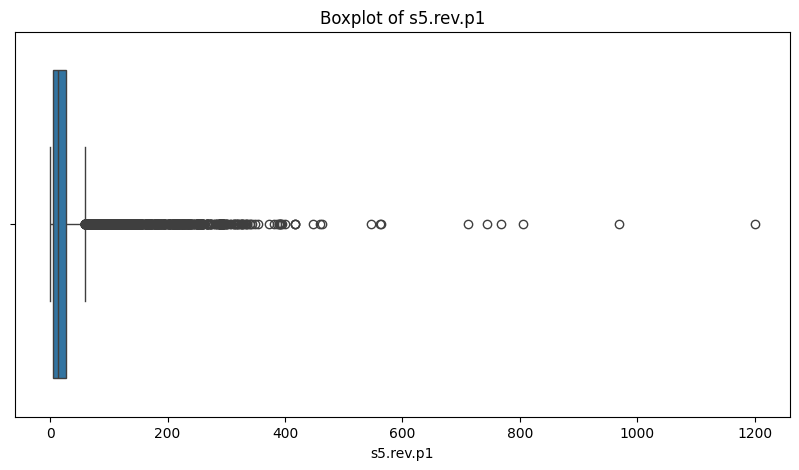

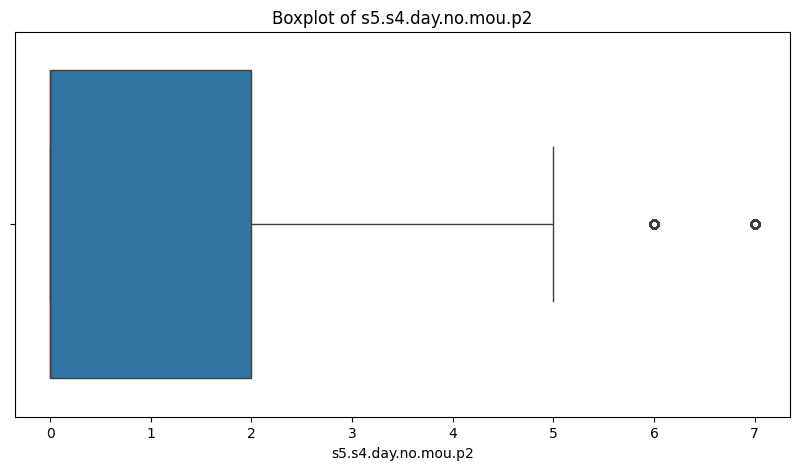

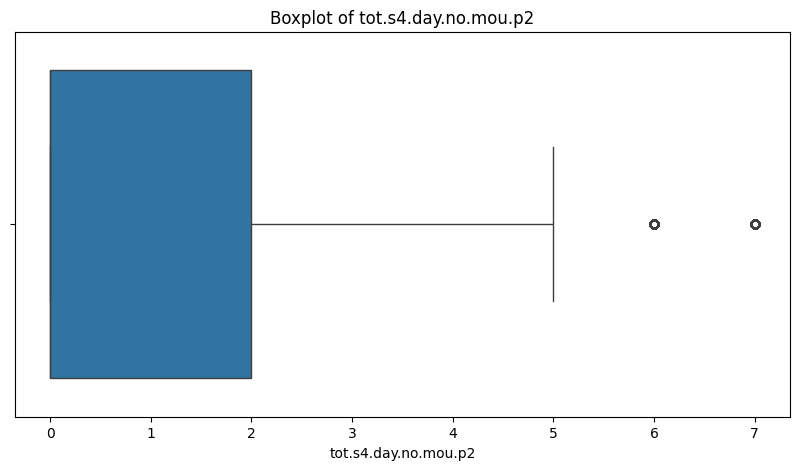

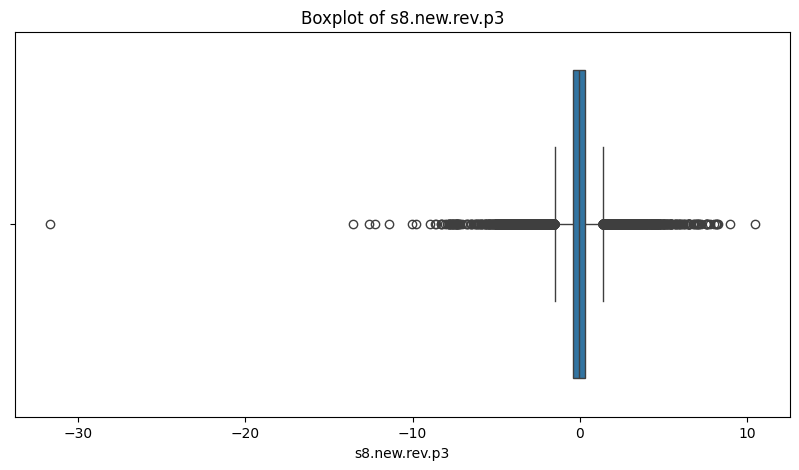

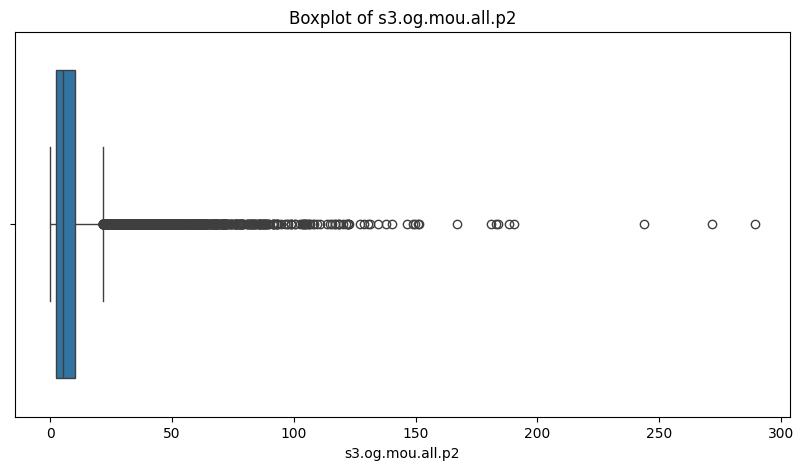

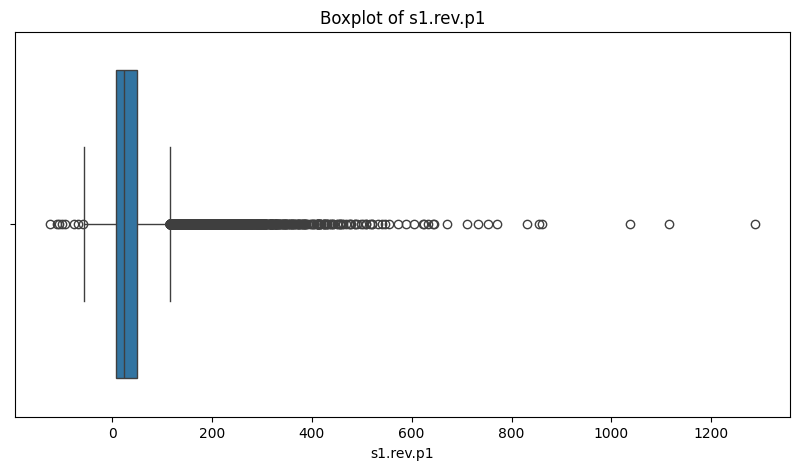

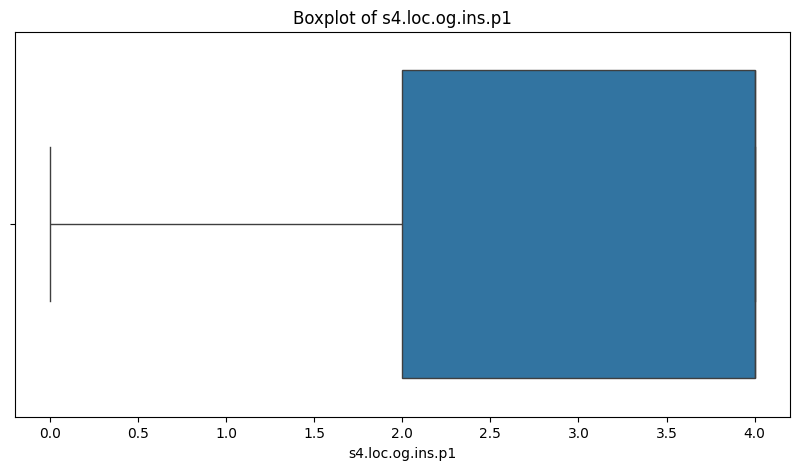

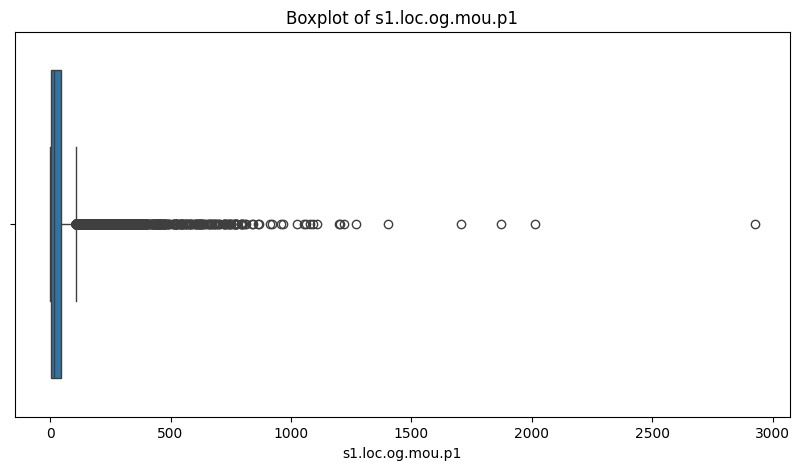

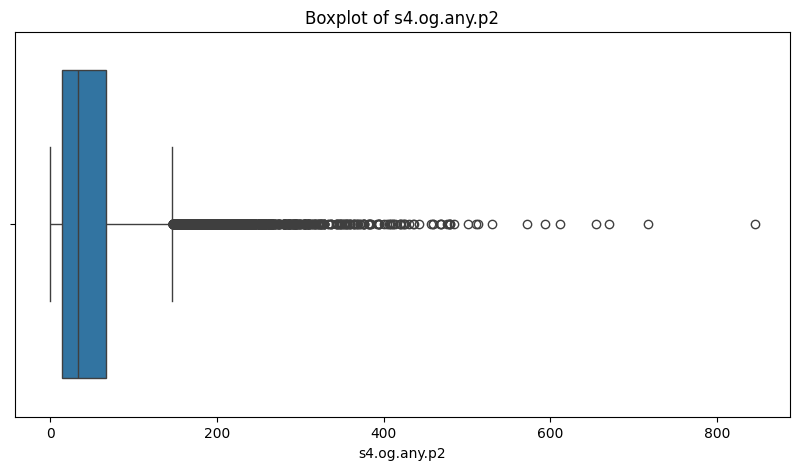

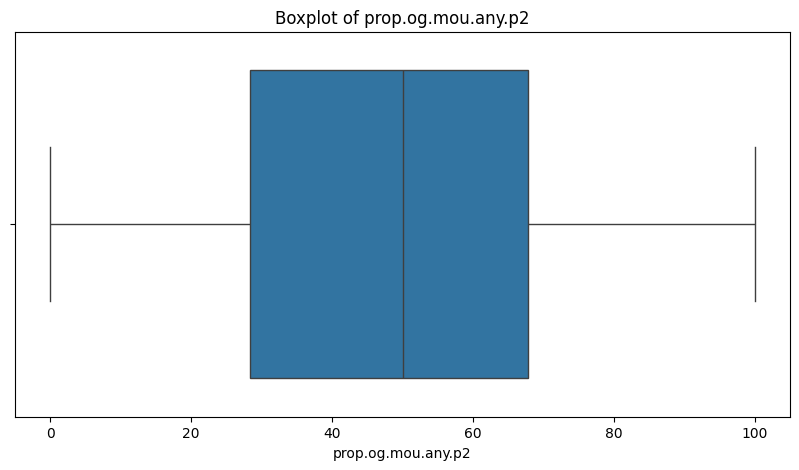

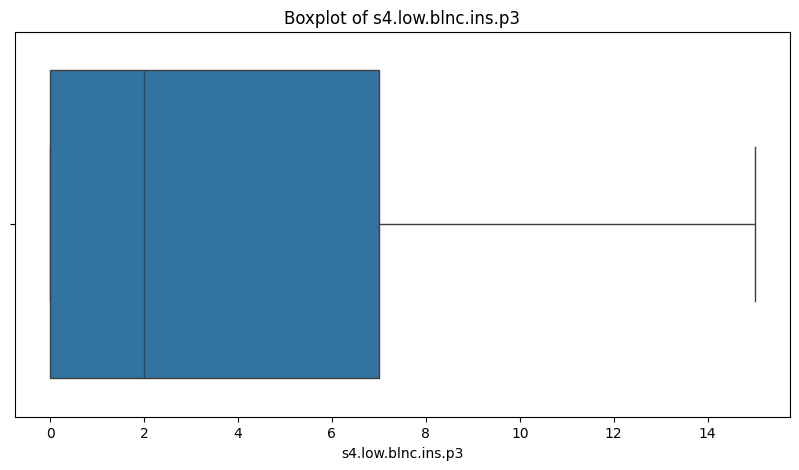

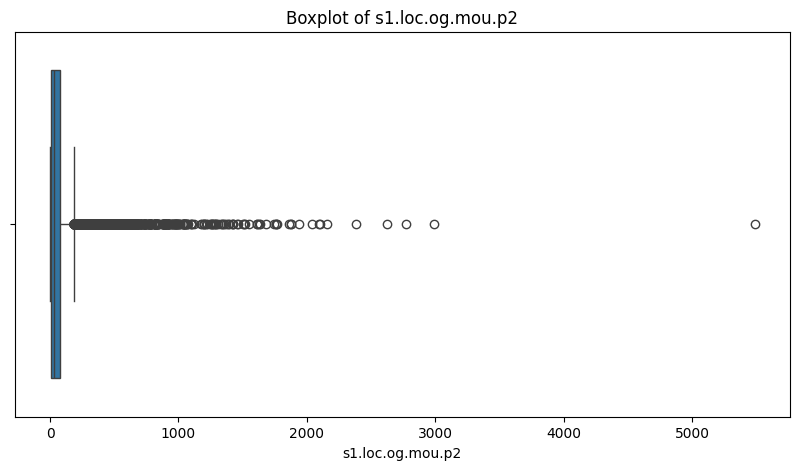

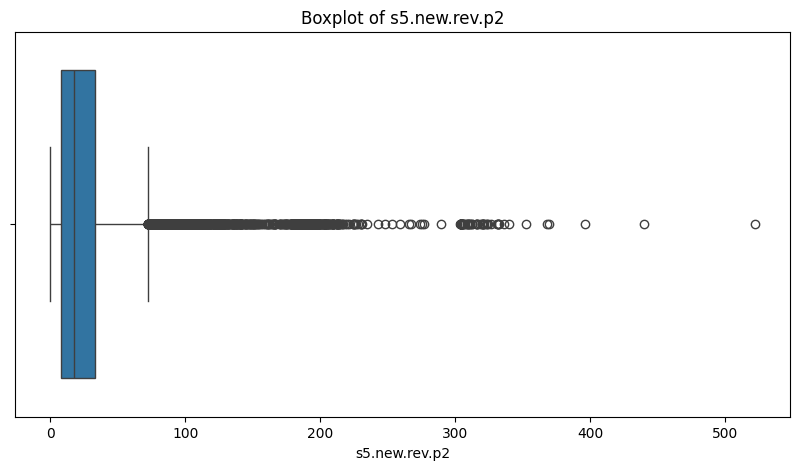

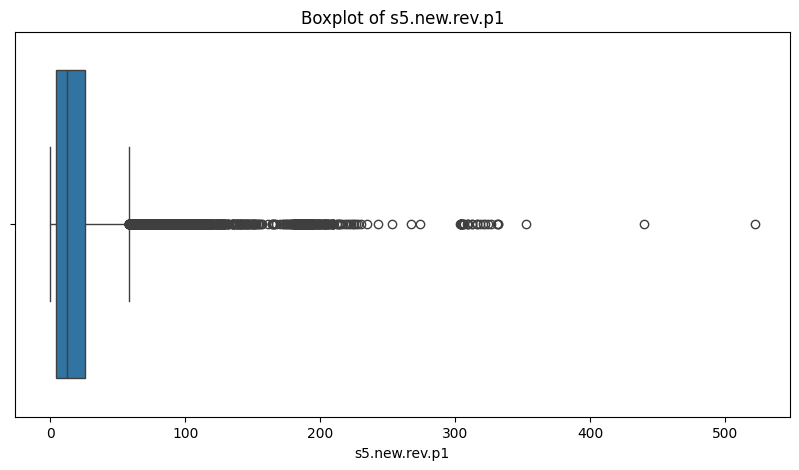

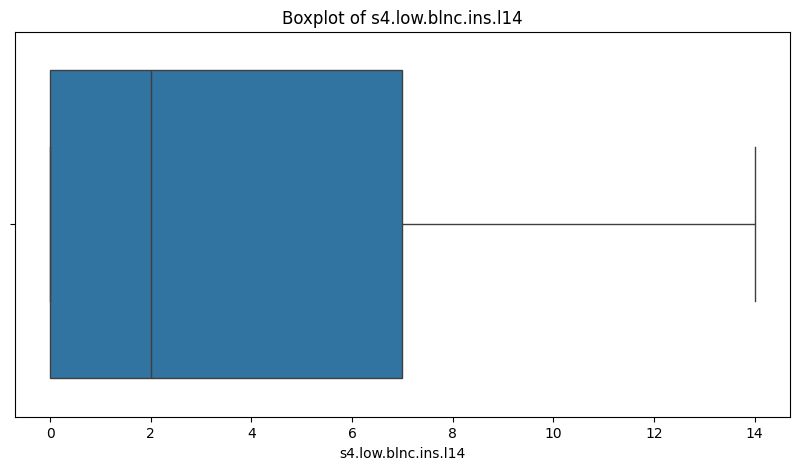

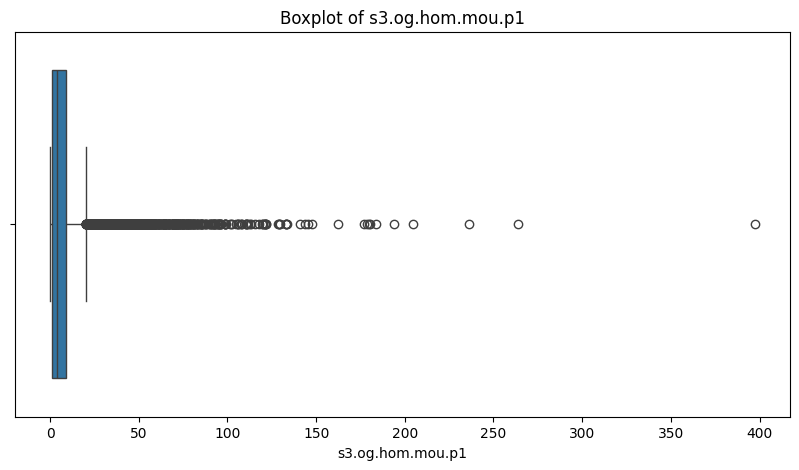

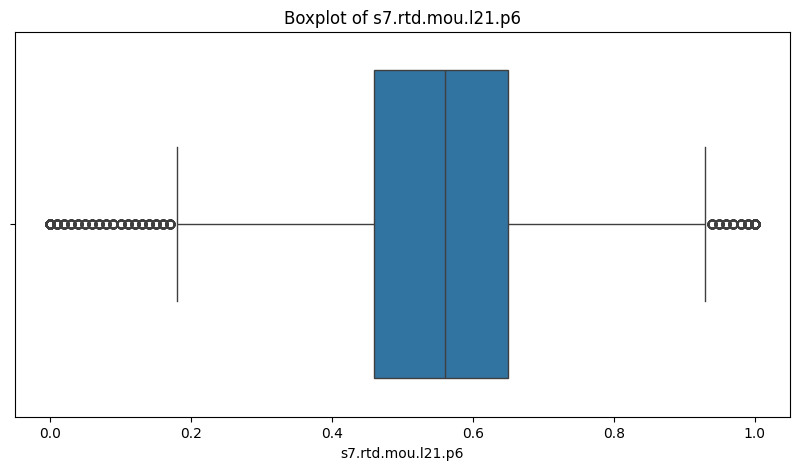

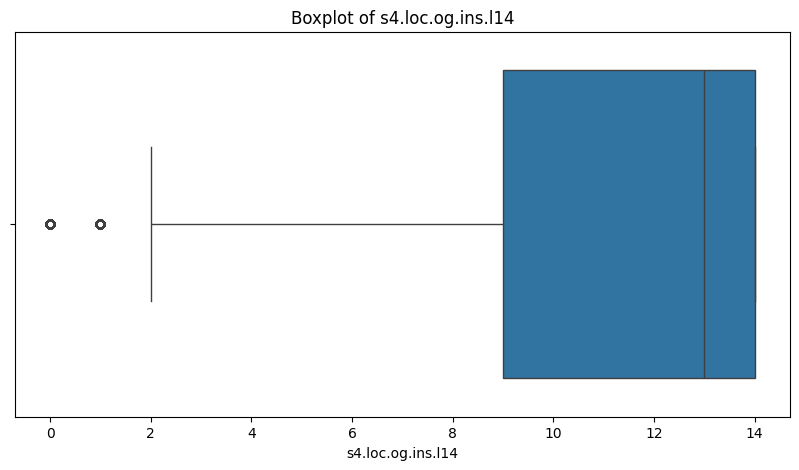

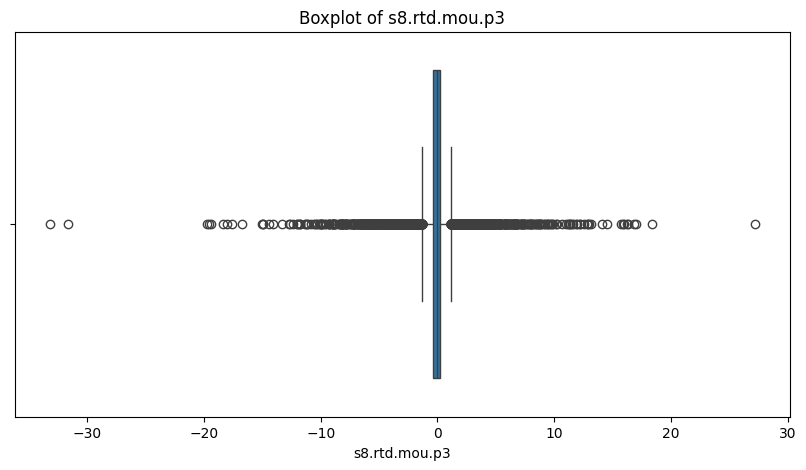

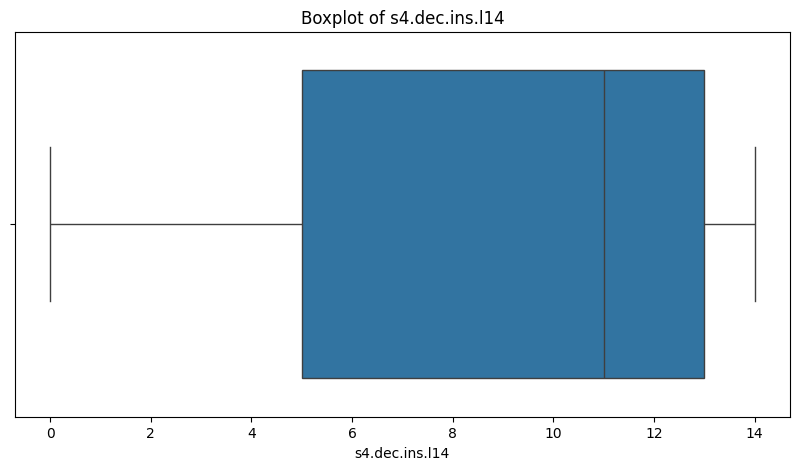

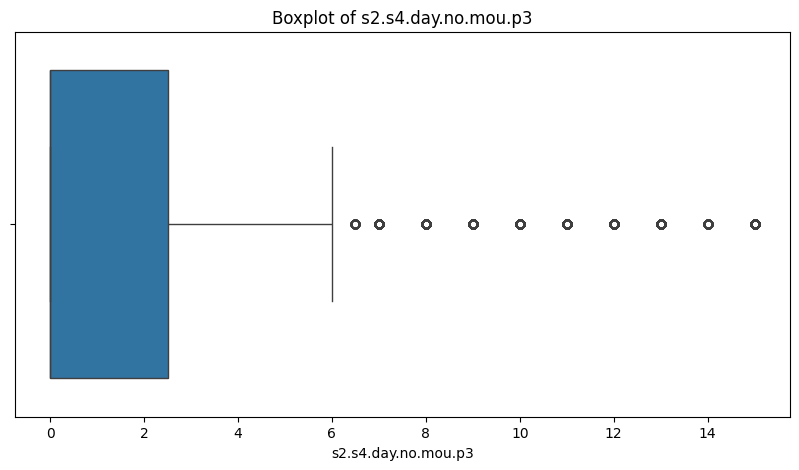

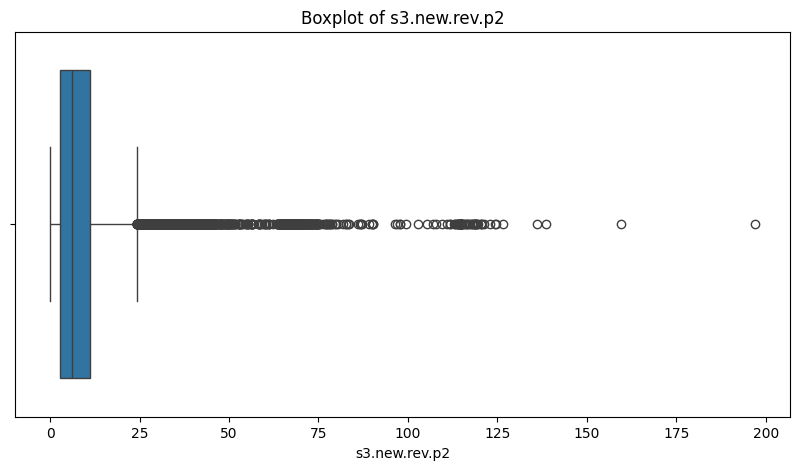

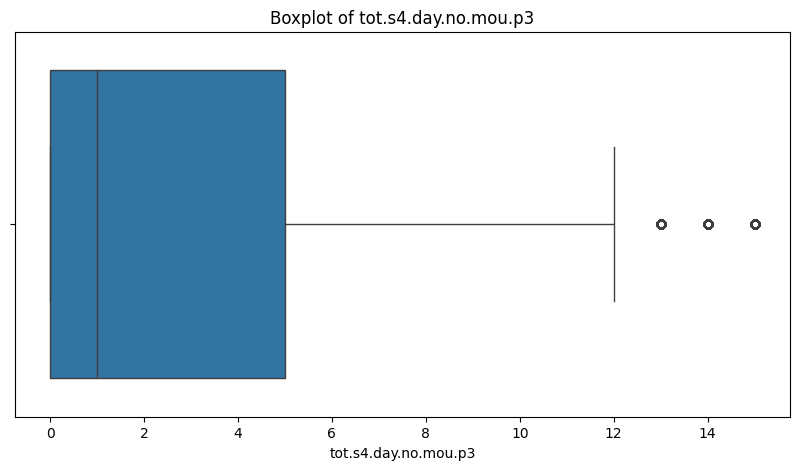

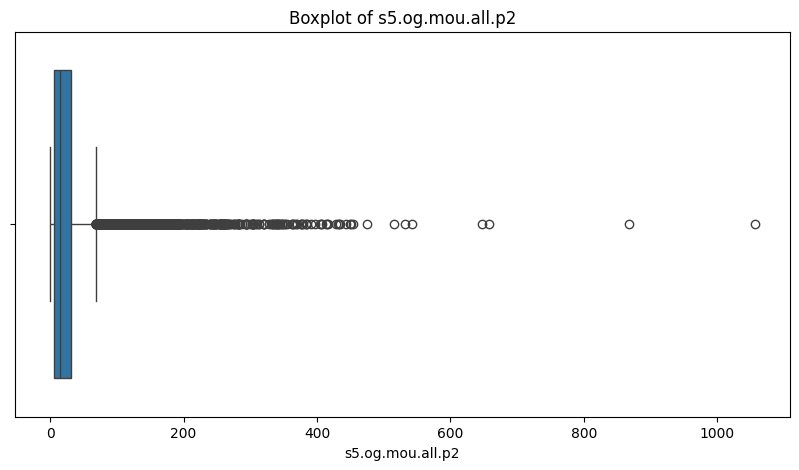

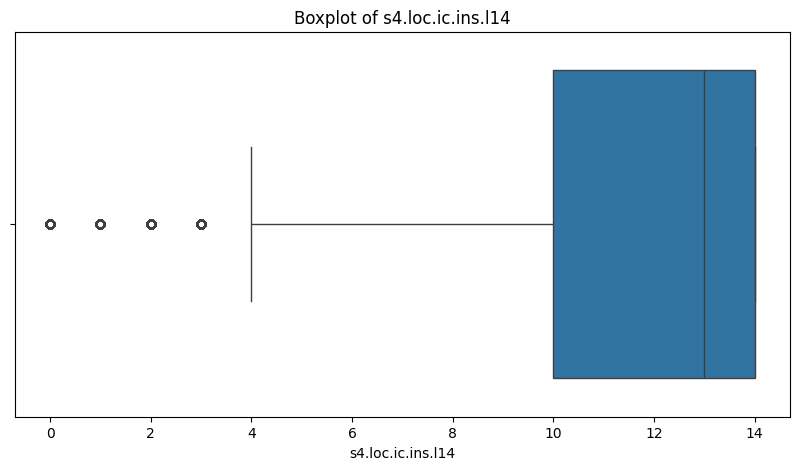

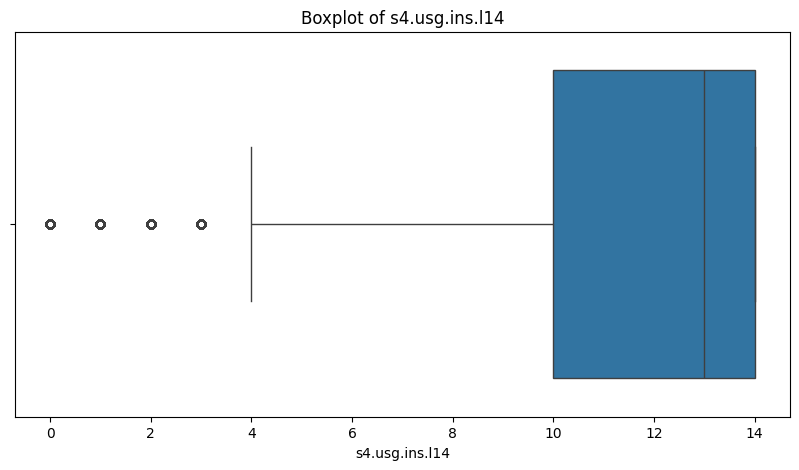

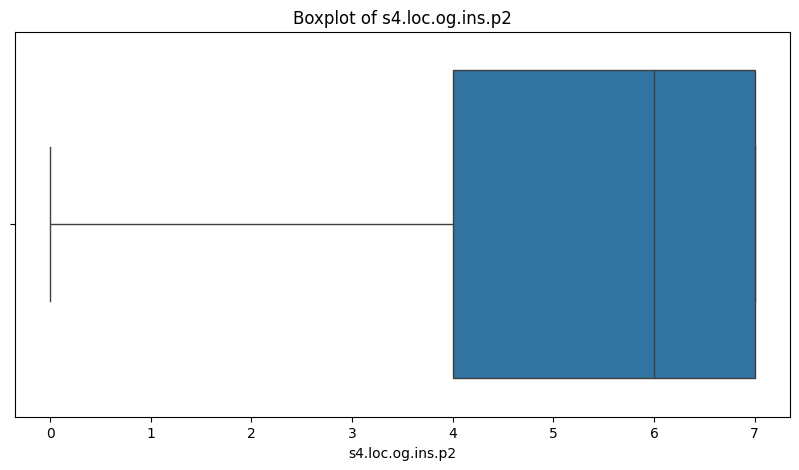

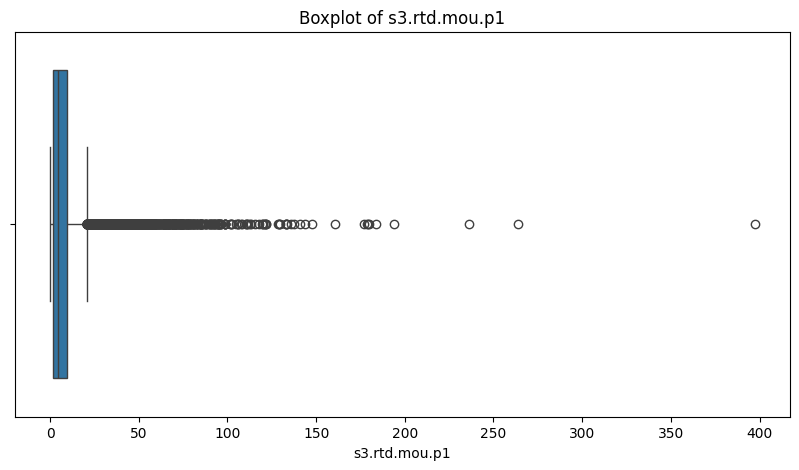

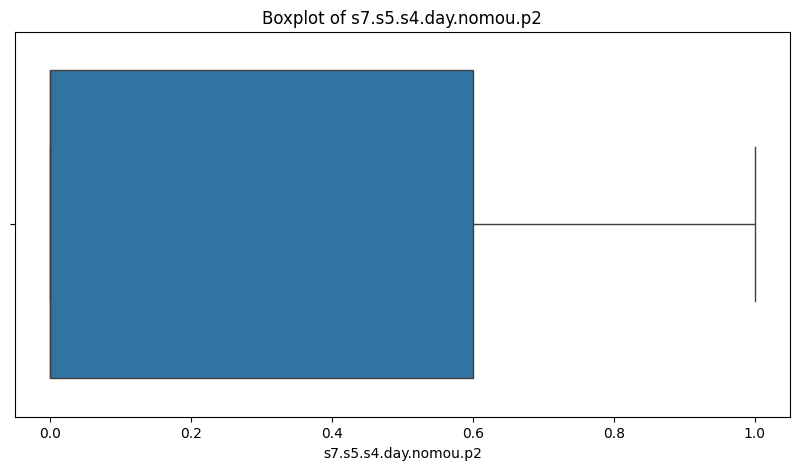

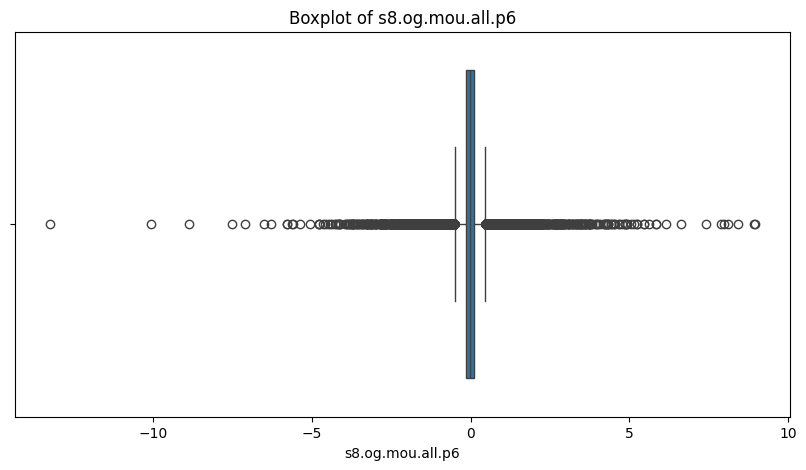

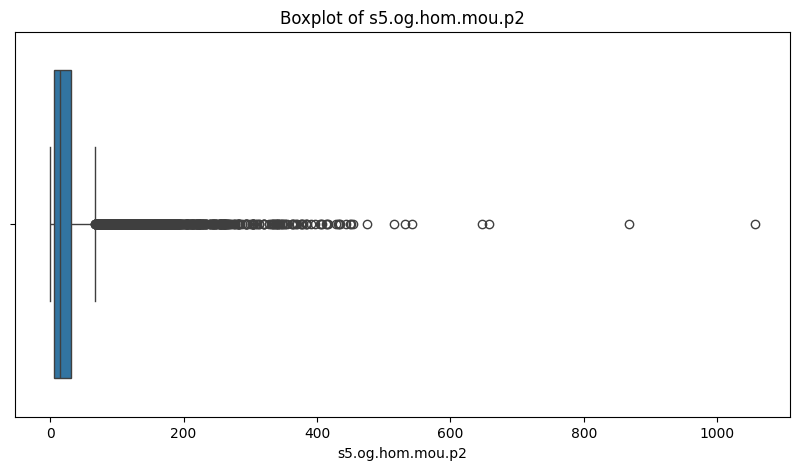

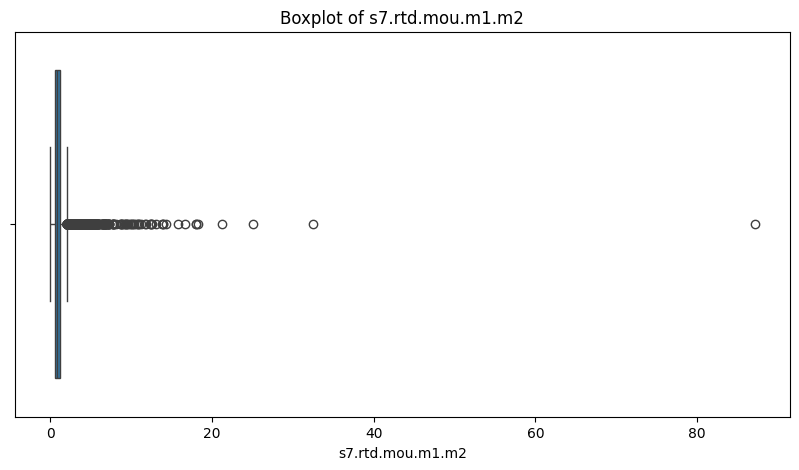

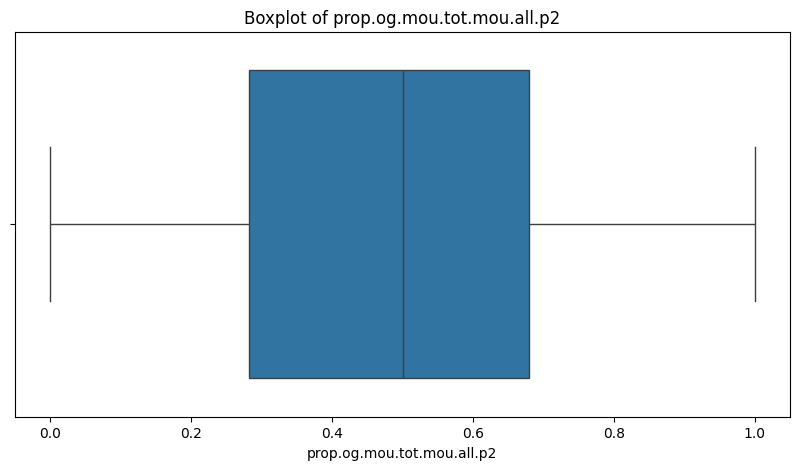

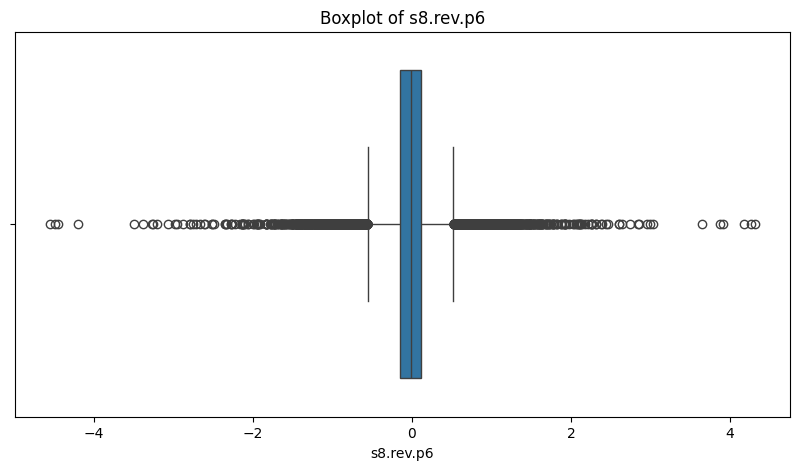

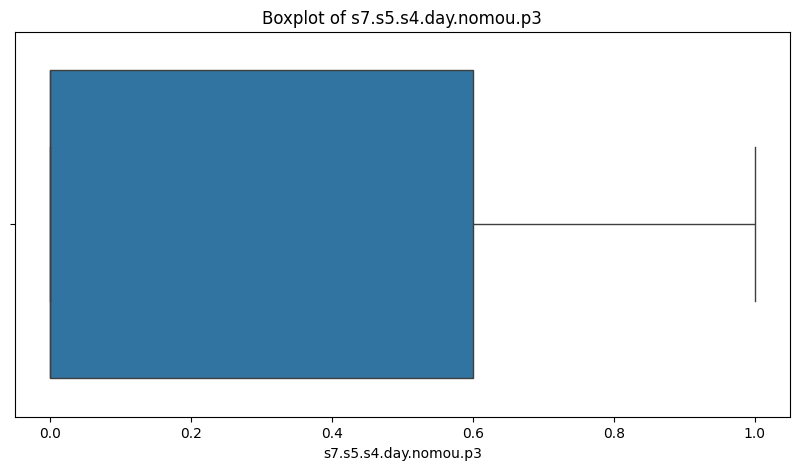

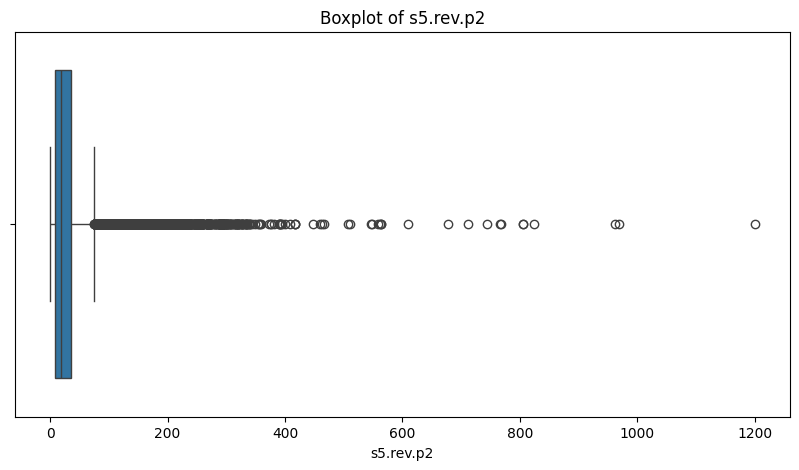

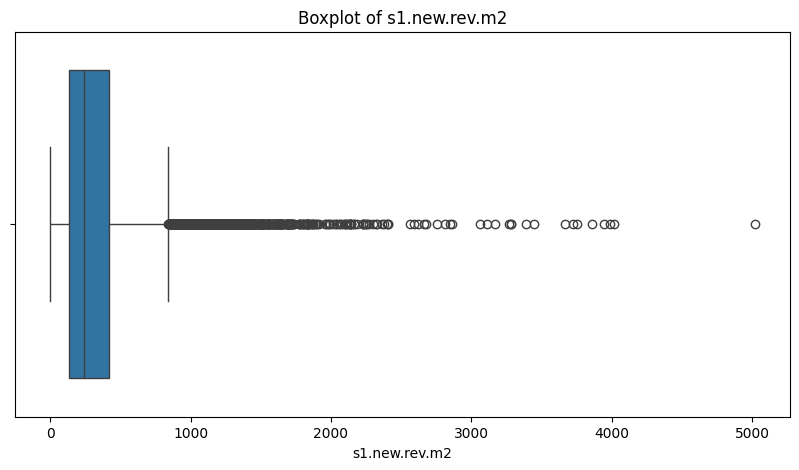

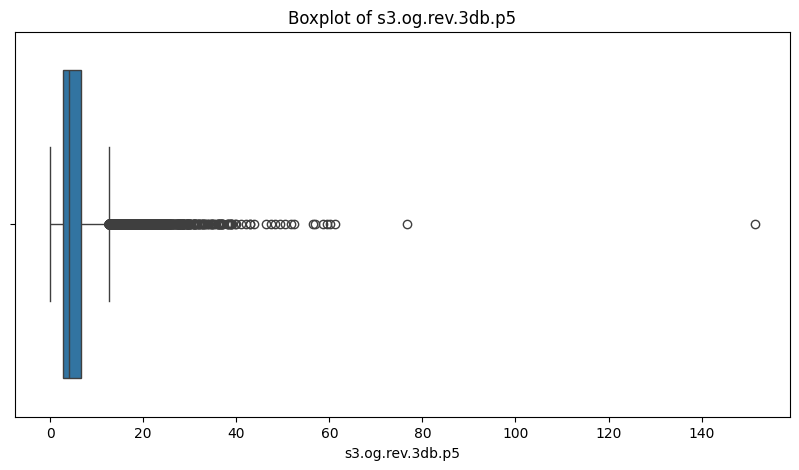

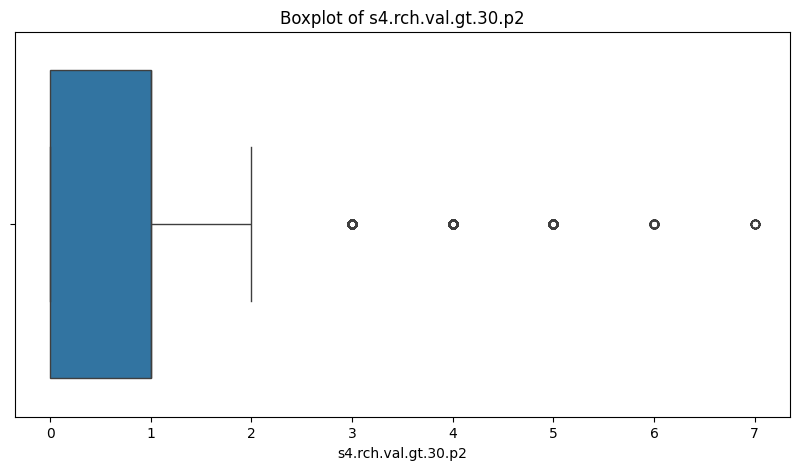

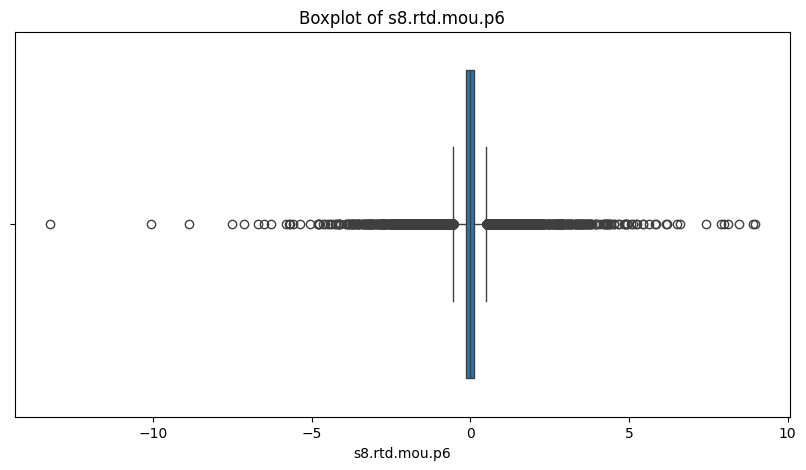

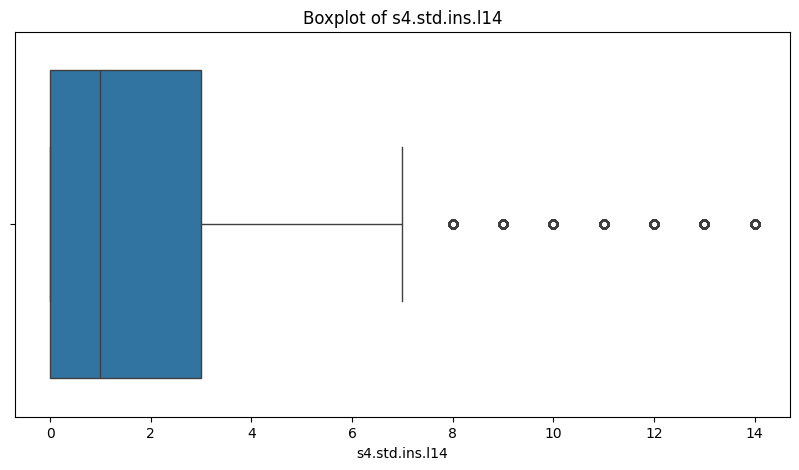

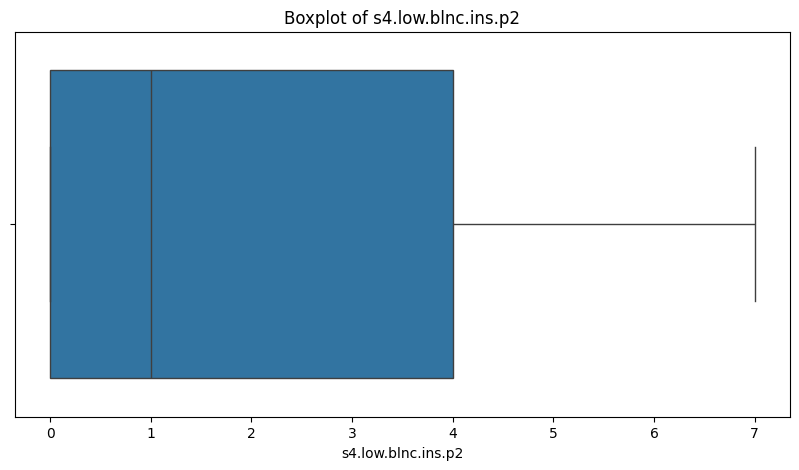

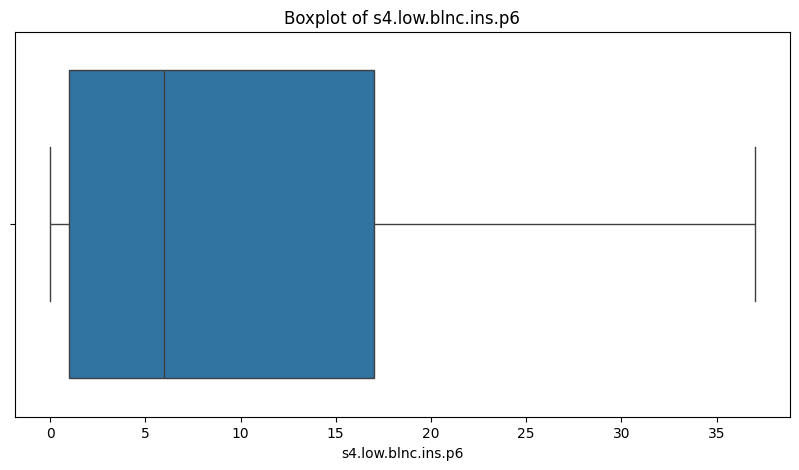

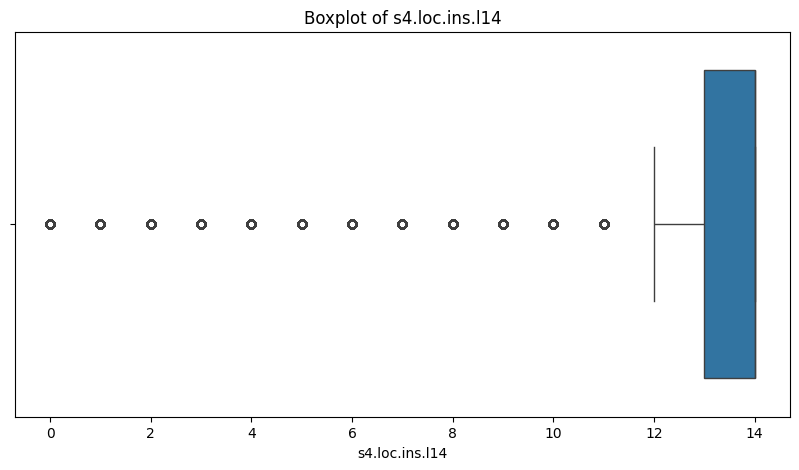

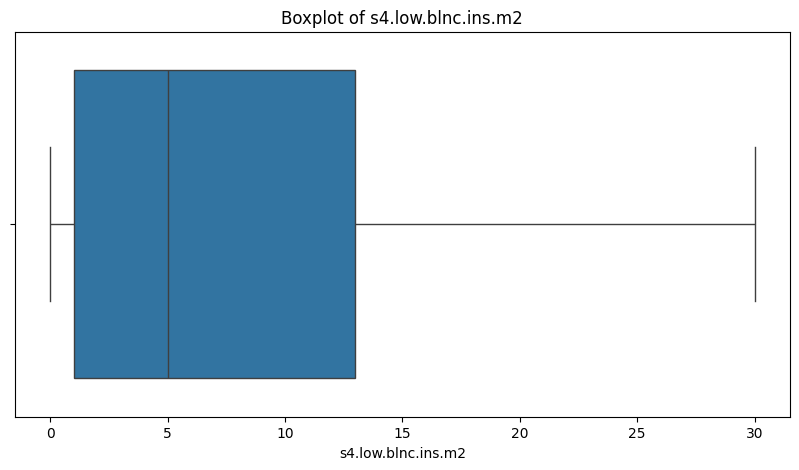

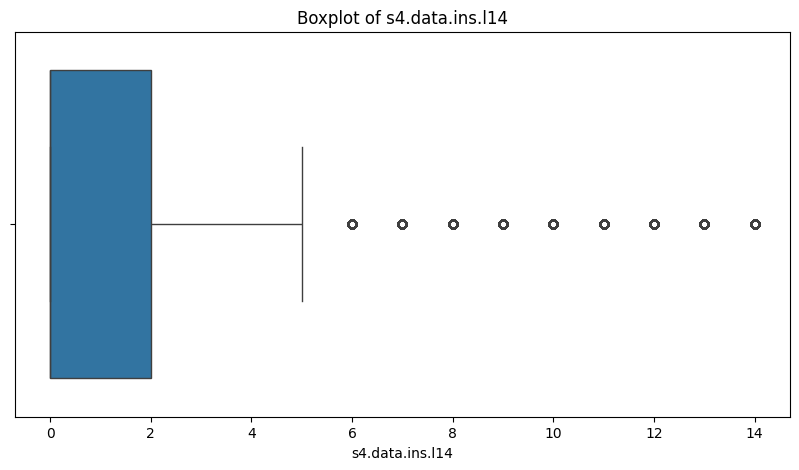

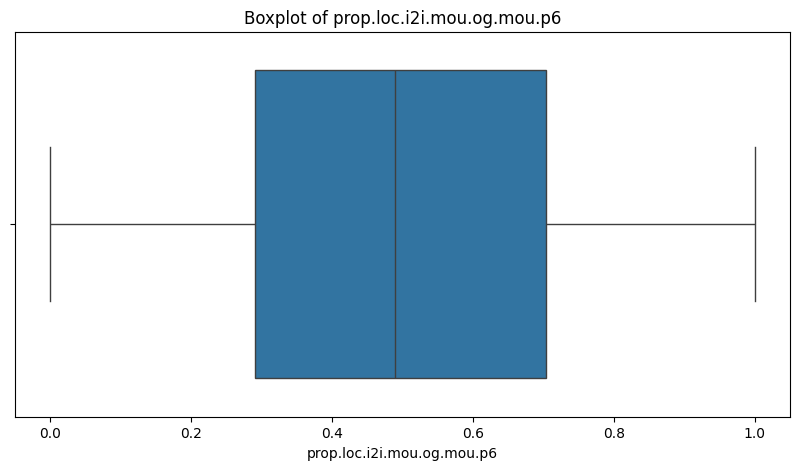

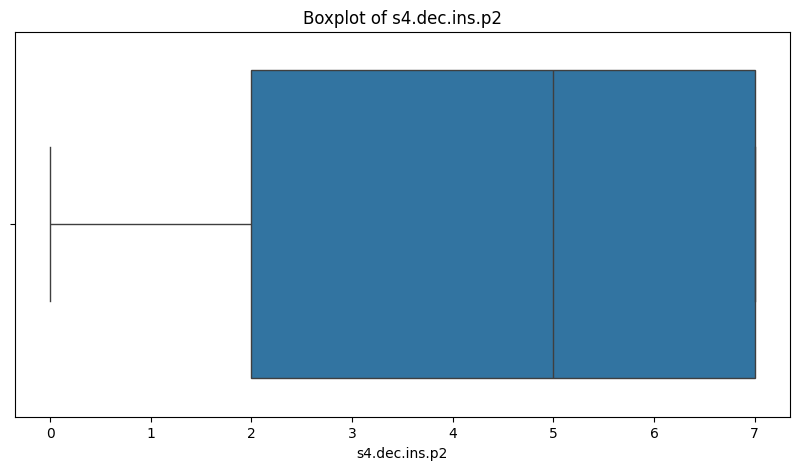

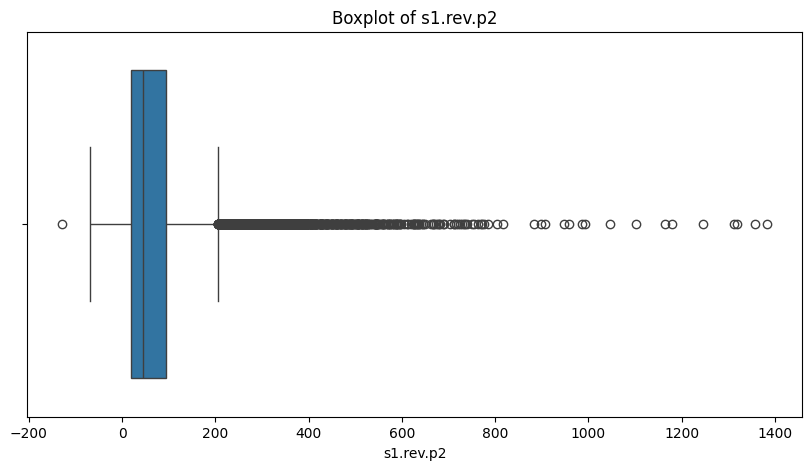

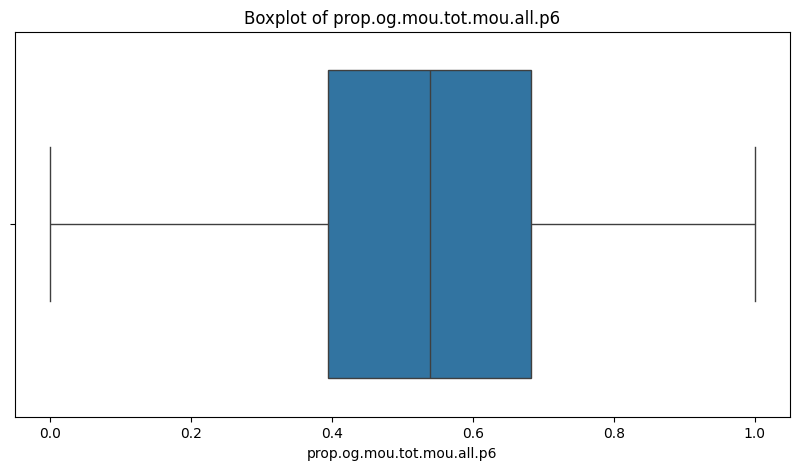

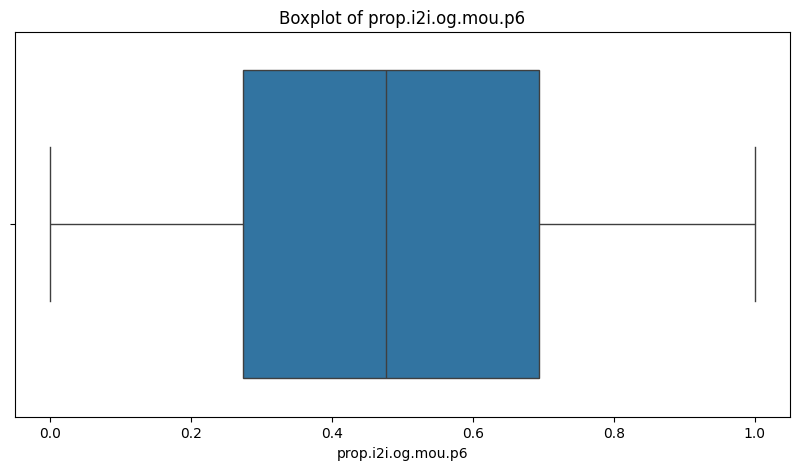

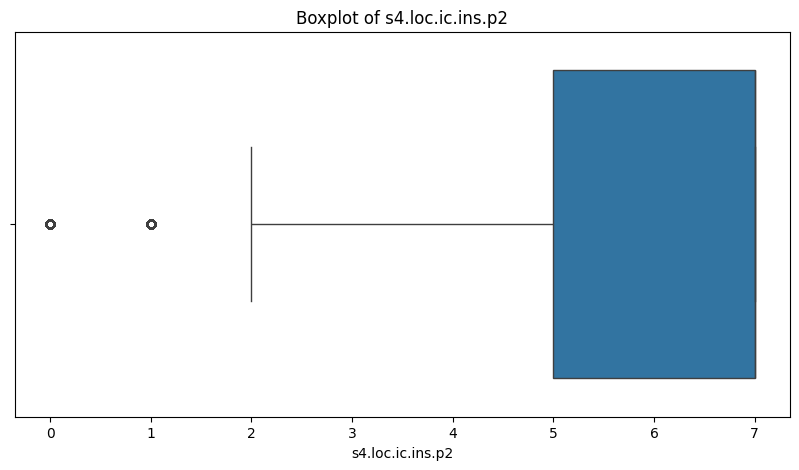

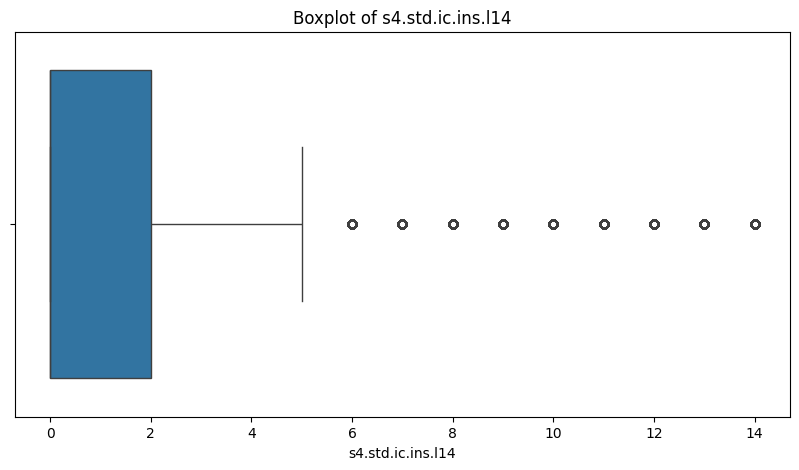

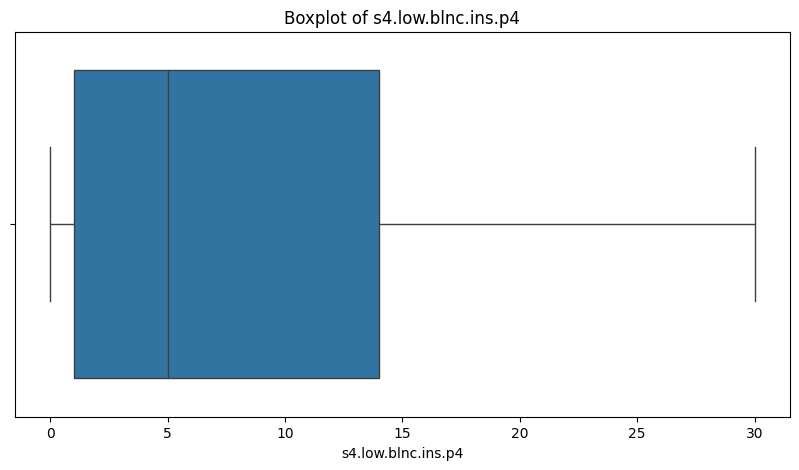

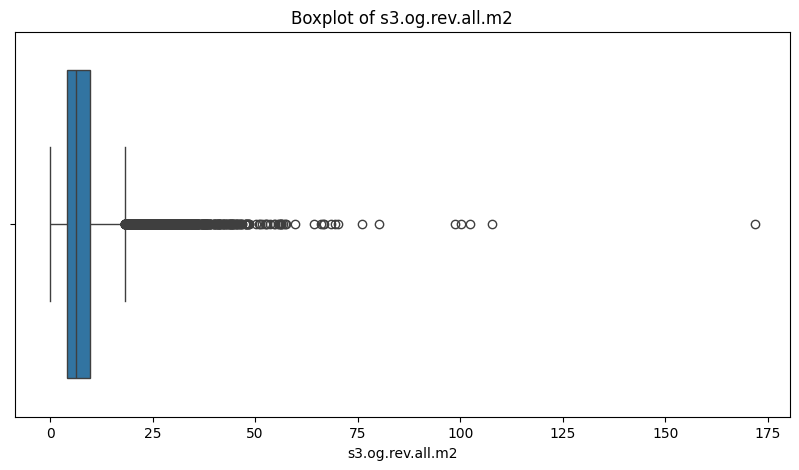

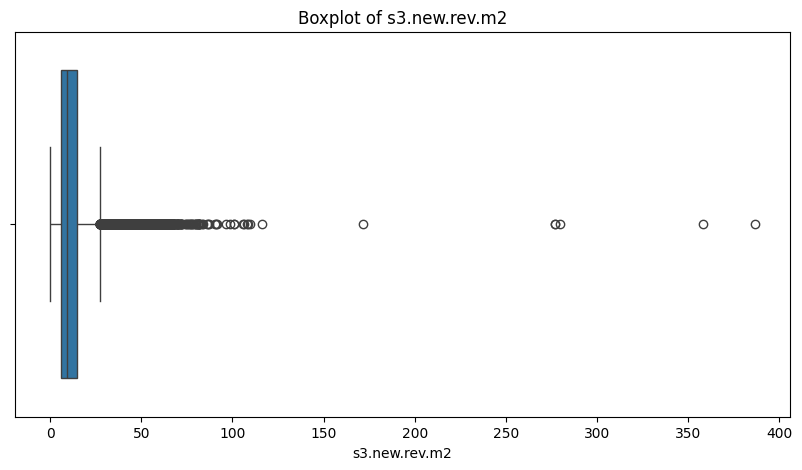

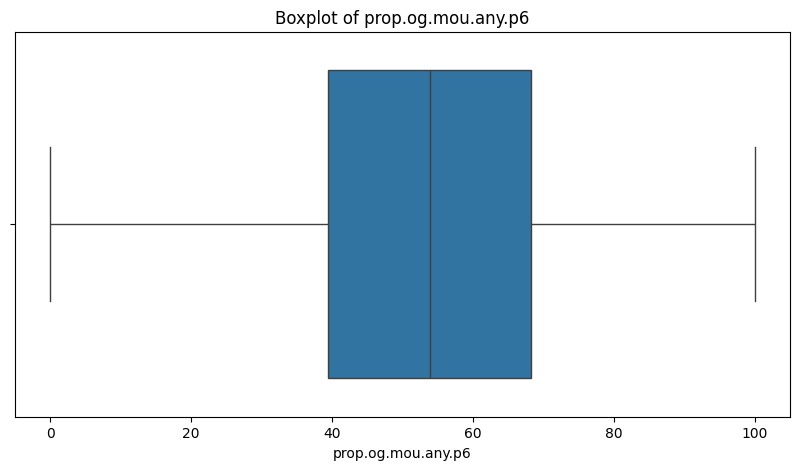

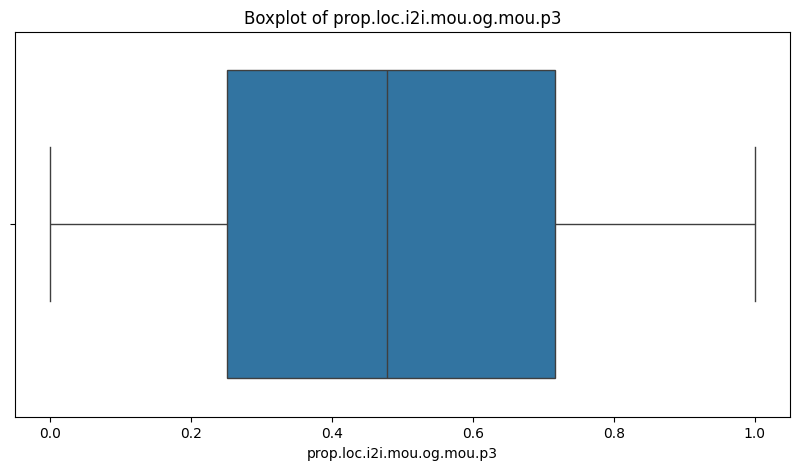

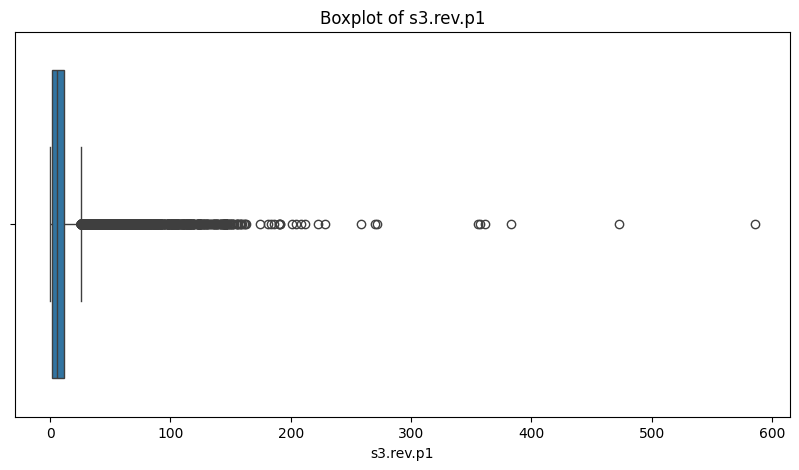

In [182]:
# Visualize outliers with boxplots
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [185]:
# Cap and floor outliers treatment
def cap_floor(series):
    lower_bound = series.quantile(0.05)
    upper_bound = series.quantile(0.95)
    return series.clip(lower_bound, upper_bound)

In [186]:
# Standardize numerical
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [187]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
iters = range(len(correlation_matrix.columns) - 1)
drop_cols = []

In [112]:
# Remove the highly correlated variables
corr_matrix = df.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_vars = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
df.drop(columns=high_corr_vars, inplace=True)
print("Number of columns after removing highly correlated variables:")
df.shape[1]

Number of columns after removing highly correlated variables:


57

In [113]:
df['target'] = pd.cut(df['target'], bins=2, labels=[0, 1])

In [114]:
# Verify target variable classes
print("Target variable classes:", df['target'].unique())

Target variable classes: [1, 0]
Categories (2, int64): [0 < 1]


In [115]:
# Define X and y
X = df.drop('target', axis=1)  # Replace 'target' with the actual name of your target variable
y = df['target']  # Replace 'target' with the actual name of your target variable

In [116]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:

# Define the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [118]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [119]:
# Predict on the test set
y_pred = model.predict(X_test)

In [120]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [122]:

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.8052
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      3437
           1       0.73      0.59      0.66      1563

    accuracy                           0.81      5000
   macro avg       0.78      0.75      0.76      5000
weighted avg       0.80      0.81      0.80      5000



In [123]:
# Use a subset of the data for hyperparameter tuning to save time
subset_size = 0.2  # Use 20% of the data
X_train_sub, _, y_train_sub, _ = train_test_split(X_train, y_train, test_size=1 - subset_size, random_state=42)

In [124]:
# Define the parameter grid
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [125]:

# Define the Random Forest model
model = RandomForestClassifier(random_state=42)

In [126]:
# Set up RandomizedSearchCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, cv=4, verbose=2, random_state=42, n_jobs=-1)

In [127]:
# Train the model with hyperparameter tuning
random_search.fit(X_train_sub, y_train_sub)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [128]:
# Best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

Best hyperparameters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': True}


In [205]:

best_model.fit(X_train, y_train)
rf_y_pred = best_model.predict(X_test)
rf_y_pred_prob = best_model.predict_proba(X_test)[:, 1]
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_report = classification_report(y_test, rf_y_pred)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_pred_prob)
rf_auc = roc_auc_score(y_test, rf_y_pred_prob)

In [207]:
print(f"Random Forest - Accuracy: {rf_accuracy}")
print(f"Random Forest - Classification Report:\n{rf_report}")
print(f"Random Forest - AUC: {rf_auc}")


Random Forest - Accuracy: 0.8086
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      3437
           1       0.74      0.60      0.66      1563

    accuracy                           0.81      5000
   macro avg       0.79      0.75      0.76      5000
weighted avg       0.80      0.81      0.80      5000

Random Forest - AUC: 0.8534893041384163


In [131]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.8086
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      3437
           1       0.74      0.60      0.66      1563

    accuracy                           0.81      5000
   macro avg       0.79      0.75      0.76      5000
weighted avg       0.80      0.81      0.80      5000



In [133]:
# Define the Decision Tree model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=45)



In [134]:
# Train the Decision Tree model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=45)

In [135]:
# Predict on the test set using Decision Tree
dt_y_pred = dt_model.predict(X_test)


In [136]:

# Evaluate the Decision Tree model
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_report = classification_report(y_test, dt_y_pred)

In [137]:

print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Decision Tree Classification Report:\n{dt_report}")

Decision Tree Accuracy: 0.7262
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      3437
           1       0.56      0.59      0.57      1563

    accuracy                           0.73      5000
   macro avg       0.68      0.69      0.69      5000
weighted avg       0.73      0.73      0.73      5000



In [142]:
# Decision Tree model hyperparameter tuning
dt_param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [191]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_random_search = RandomizedSearchCV(estimator=dt_model, param_distributions=dt_param_grid, n_iter=50, cv=4, verbose=2, random_state=42, n_jobs=-1)
dt_random_search.fit(X_train_sub, y_train_sub)
dt_best_model = dt_random_search.best_estimator_


Fitting 4 folds for each of 50 candidates, totalling 200 fits


In [194]:
# Decision Tree
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
dt_best_model.fit(X_train, y_train)
dt_y_pred = dt_best_model.predict(X_test)
dt_y_pred_prob = dt_best_model.predict_proba(X_test)[:, 1]
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_report = classification_report(y_test, dt_y_pred)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_y_pred_prob)
dt_auc = roc_auc_score(y_test, dt_y_pred_prob)


In [195]:
print(f"Decision Tree - Accuracy: {dt_accuracy}")
print(f"Decision Tree - Classification Report:\n{dt_report}")


Decision Tree - Accuracy: 0.7692
Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      3437
           1       0.66      0.53      0.59      1563

    accuracy                           0.77      5000
   macro avg       0.73      0.70      0.71      5000
weighted avg       0.76      0.77      0.76      5000



In [146]:
from sklearn.linear_model import LogisticRegression

In [147]:
# Define the Logistic Regression model
lr_model = LogisticRegression(random_state=42)

In [148]:
# Train the model
lr_model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [149]:
# Predict on the test set
lr_y_pred = lr_model.predict(X_test)

In [150]:
# Evaluate the model
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_report = classification_report(y_test, lr_y_pred)

In [151]:
print(f"Logistic Regression Accuracy: {lr_accuracy}")
print(f"Logistic Regression Classification Report:\n{lr_report}")

Logistic Regression Accuracy: 0.8042
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      3437
           1       0.73      0.60      0.66      1563

    accuracy                           0.80      5000
   macro avg       0.78      0.75      0.76      5000
weighted avg       0.80      0.80      0.80      5000



In [161]:
# Logistic Regression model hyperparameter tuning
lr_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300, 400, 500]
}

In [162]:

lr_model = LogisticRegression(random_state=42)
lr_random_search = RandomizedSearchCV(estimator=lr_model, param_distributions=lr_param_grid, n_iter=50, cv=4, verbose=2, random_state=42, n_jobs=-1)
lr_random_search.fit(X_train_sub, y_train_sub)
lr_best_model = lr_random_search.best_estimator_

Fitting 4 folds for each of 50 candidates, totalling 200 fits


In [196]:
# Logistic Regression
lr_best_model.fit(X_train, y_train)
lr_y_pred = lr_best_model.predict(X_test)
lr_y_pred_prob = lr_best_model.predict_proba(X_test)[:, 1]
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_report = classification_report(y_test, lr_y_pred)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_y_pred_prob)
lr_auc = roc_auc_score(y_test, lr_y_pred_prob)

In [198]:
print(f"Logistic Regression - Accuracy: {lr_accuracy}")
print(f"Logistic Regression - Classification Report:\n{lr_report}")
print(f"Logistic Regression - AUC: {lr_auc}")


Logistic Regression - Accuracy: 0.8058
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      3437
           1       0.73      0.60      0.66      1563

    accuracy                           0.81      5000
   macro avg       0.78      0.75      0.76      5000
weighted avg       0.80      0.81      0.80      5000

Logistic Regression - AUC: 0.8573245388941352


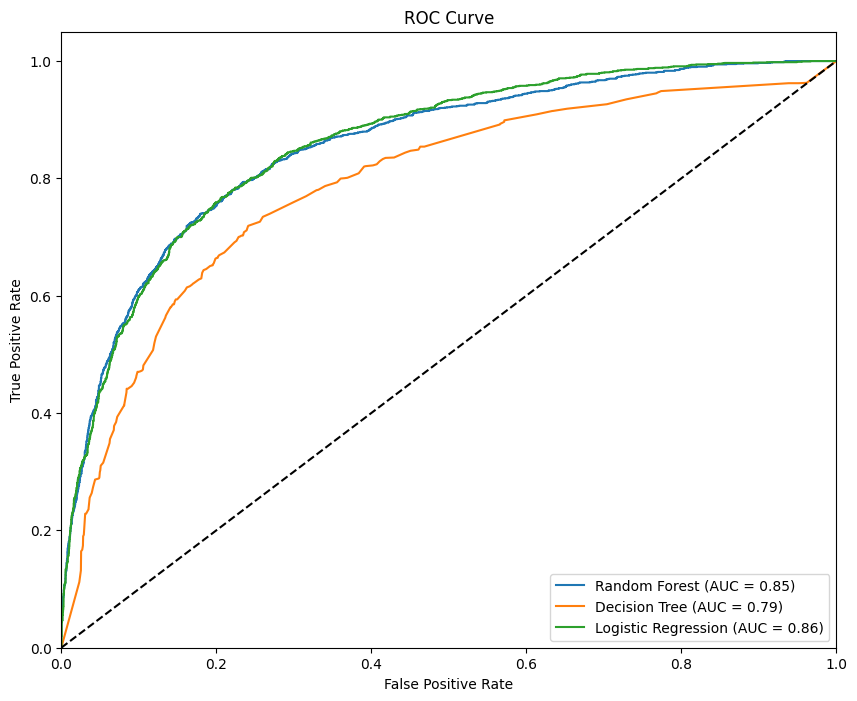

In [208]:
plt.figure(figsize=(10, 8))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})")
plt.plot(dt_fpr, dt_tpr, label=f"Decision Tree (AUC = {dt_auc:.2f})")
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {lr_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()